In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,MaxAbsScaler,LabelEncoder,StandardScaler,PolynomialFeatures,normalize,OrdinalEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,KFold,cross_validate,cross_val_score,ShuffleSplit,GridSearchCV,ShuffleSplit,RandomizedSearchCV
from sklearn import neighbors

from sklearn.dummy import DummyRegressor 
from sklearn.linear_model import LogisticRegression,SGDRegressor,LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error ,accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import mutual_info_classif

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif

import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier

from math import sqrt
%matplotlib inline
import math
import time
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [4]:
sample_df=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")
train_df=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_df=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

#### observation
* 7 Columns have null value
1. Cross_Street, 
2. Weapon_Used_Code 
3. Weapon_Description 
4. Victim_Sex 
5. Victim_Descent 
6. Premise_Description
7. Modus_Operandi

In [6]:
train_df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


#### observation:- Victime age contain have in -ve

# EDA and Preprocessing

## Numerical DATA

#### Detecting Handling_outliers

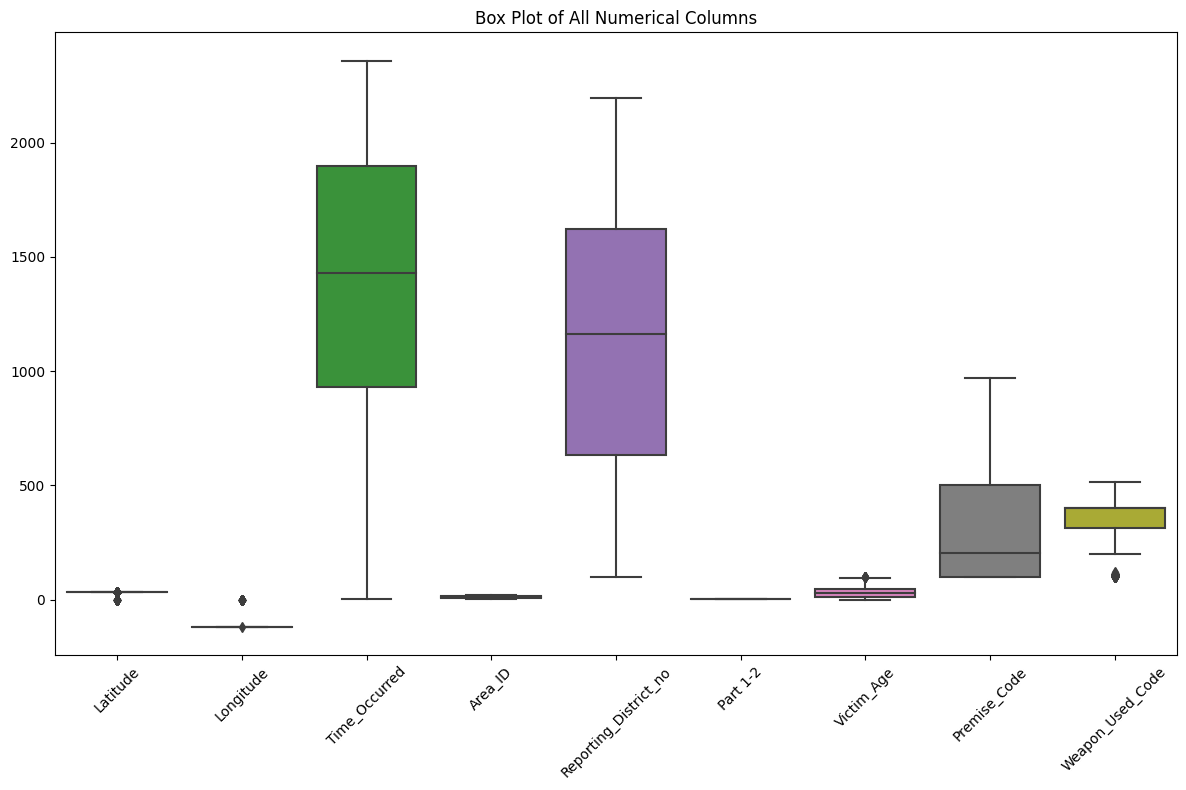

In [7]:
# Select only numerical columns
numerical_df = train_df.select_dtypes(include=['float64', 'int64'])

# Plotting the box plots for all numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_df)
plt.xticks(rotation=45)
plt.title('Box Plot of All Numerical Columns')
plt.tight_layout()
plt.show()

### LONGITUDE_AND_LATITUDE

In [8]:
def draw_lon_lat(df, world):
    geometry = [Point(xy) for xy in zip(train_df.Longitude, train_df.Latitude)]
    gdf = GeoDataFrame(df, geometry=geometry)   
    gdf.plot(ax=world.plot(figsize=(10,10)), marker='o', color='red', markersize=15);
    

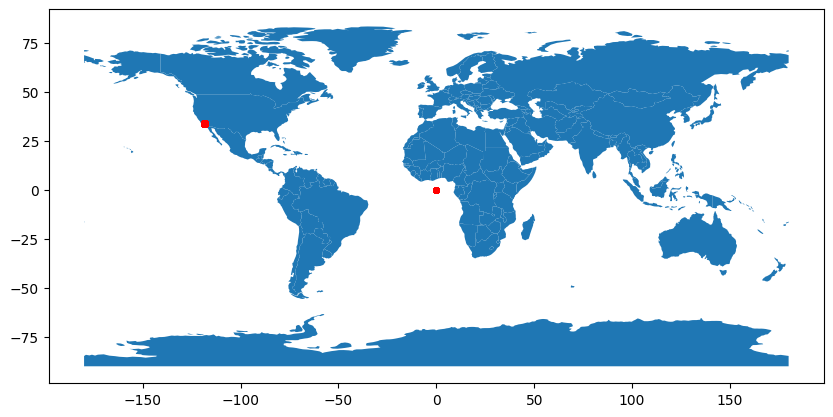

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
draw_lon_lat(train_df, world)

#### observation

* Crime Happening in 2 cluster of longitude and latitude
* Due to which longitude is right skewed and latitude is left  skewed
* Cluster at Near zero longitude and latitude are treaded as outlier

#### OBSEVATION :- column name Latidute ,longitude ,victim AGE AND WEAPON used code have outlier  

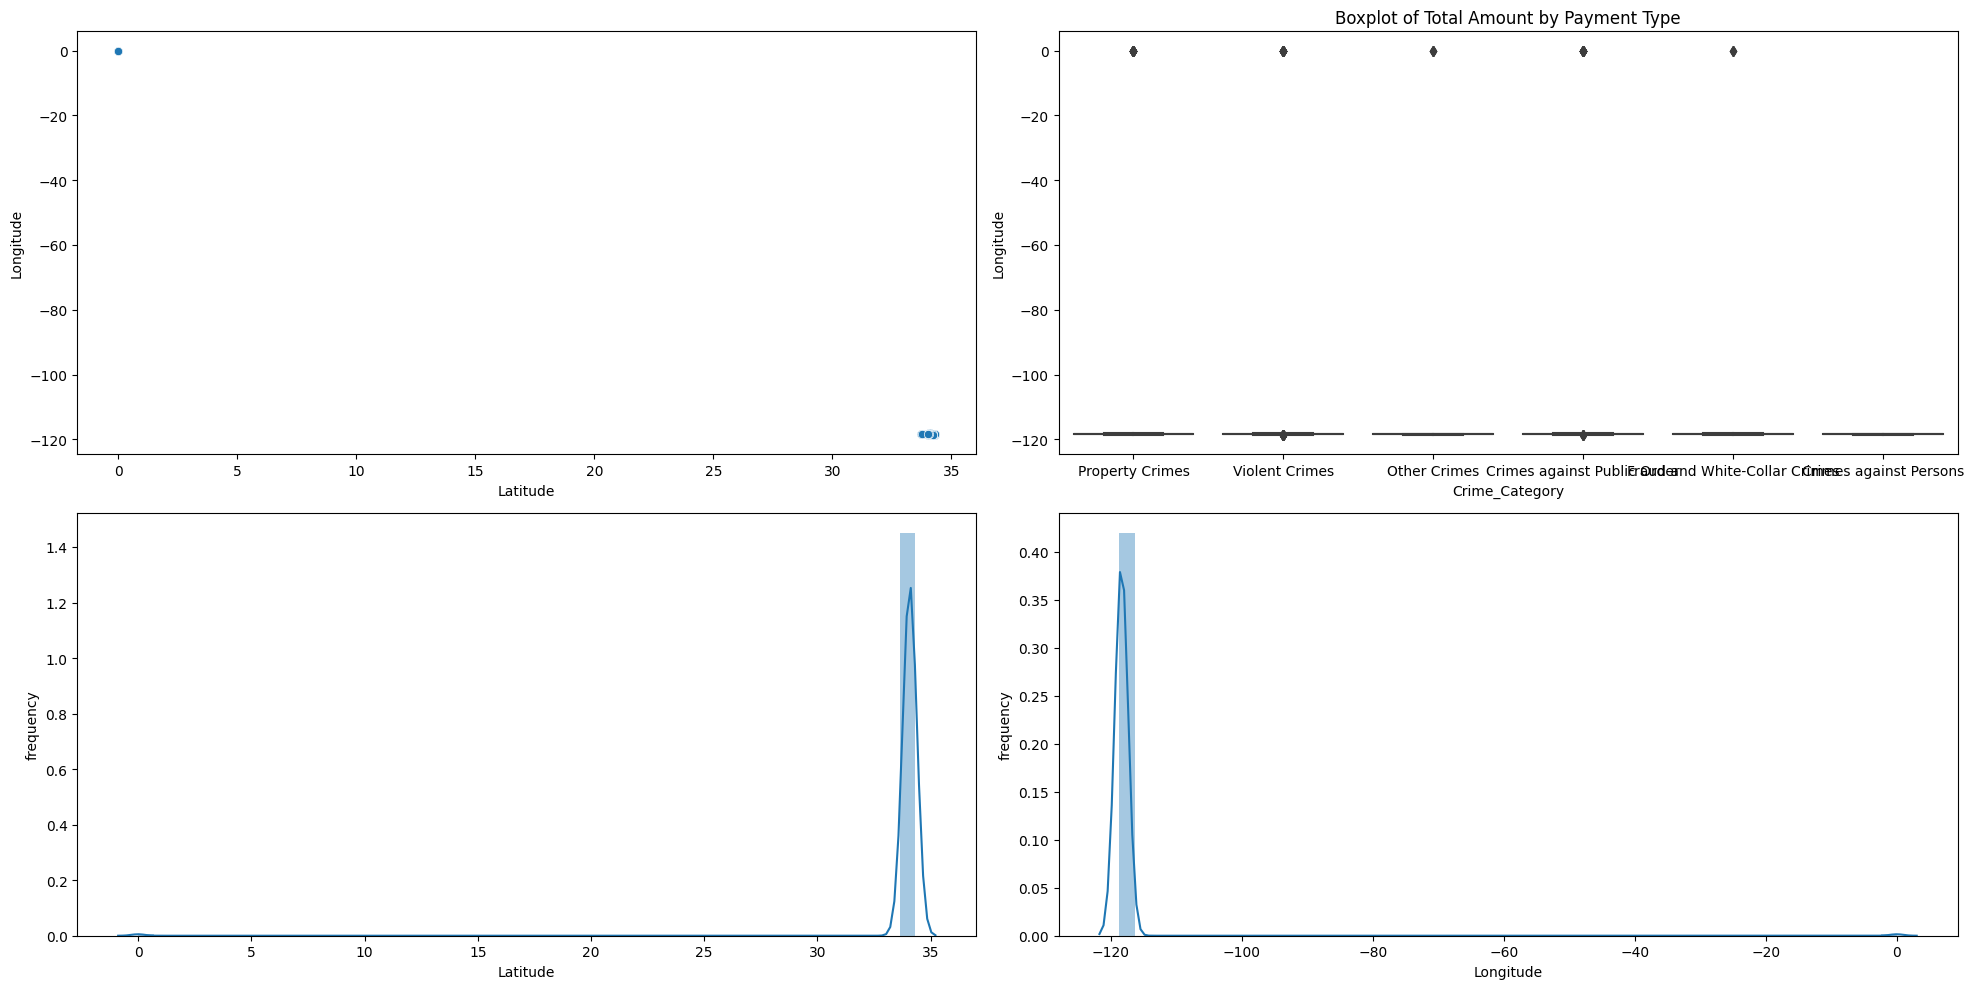

In [10]:
plt.subplots(figsize=(20, 10))
plt.subplot(2,2,1)
sns.scatterplot(data=train_df, x='Latitude', y='Longitude')

plt.subplot(2,2,3)
sns.distplot(train_df["Latitude"])
plt.xlabel('Latitude')
plt.ylabel('frequency')

plt.subplot(2,2,2)
sns.boxplot(x='Crime_Category', y='Longitude', data=train_df)
plt.title('Boxplot of Total Amount by Payment Type')


plt.subplot(2,2,4)
sns.distplot(train_df["Longitude"])
plt.xlabel('Longitude')
plt.ylabel('frequency')


plt.tight_layout()
plt.show()

<Axes: xlabel='Latitude', ylabel='Longitude'>

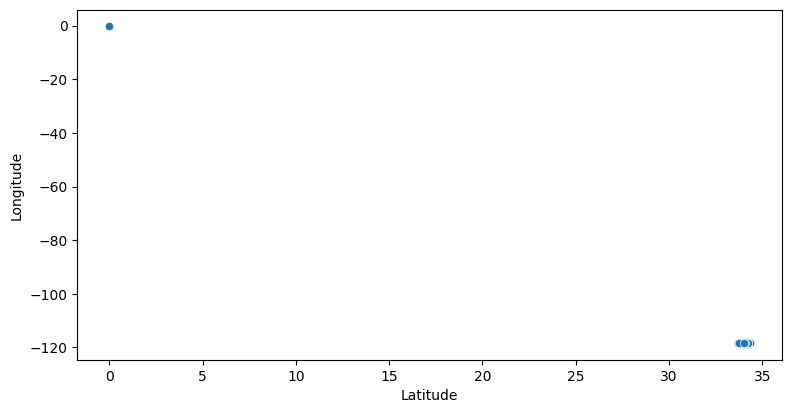

In [11]:
plt.subplots(figsize=(20, 10))
plt.subplot(2,2,1)
sns.scatterplot(data=train_df, x='Latitude', y='Longitude')

In [12]:
train_df.loc[( (train_df['Latitude']< 30)) , 'Latitude'] = 30
train_df.loc[( (train_df['Longitude']>-110)) , 'Longitude'] = -110
test_df.loc[( (test_df['Latitude']< 30)) , 'Latitude'] = 30
test_df.loc[( (test_df['Longitude']>-110)) , 'Longitude'] = -110

### Area_ID	

<Axes: xlabel='Area_ID', ylabel='count'>

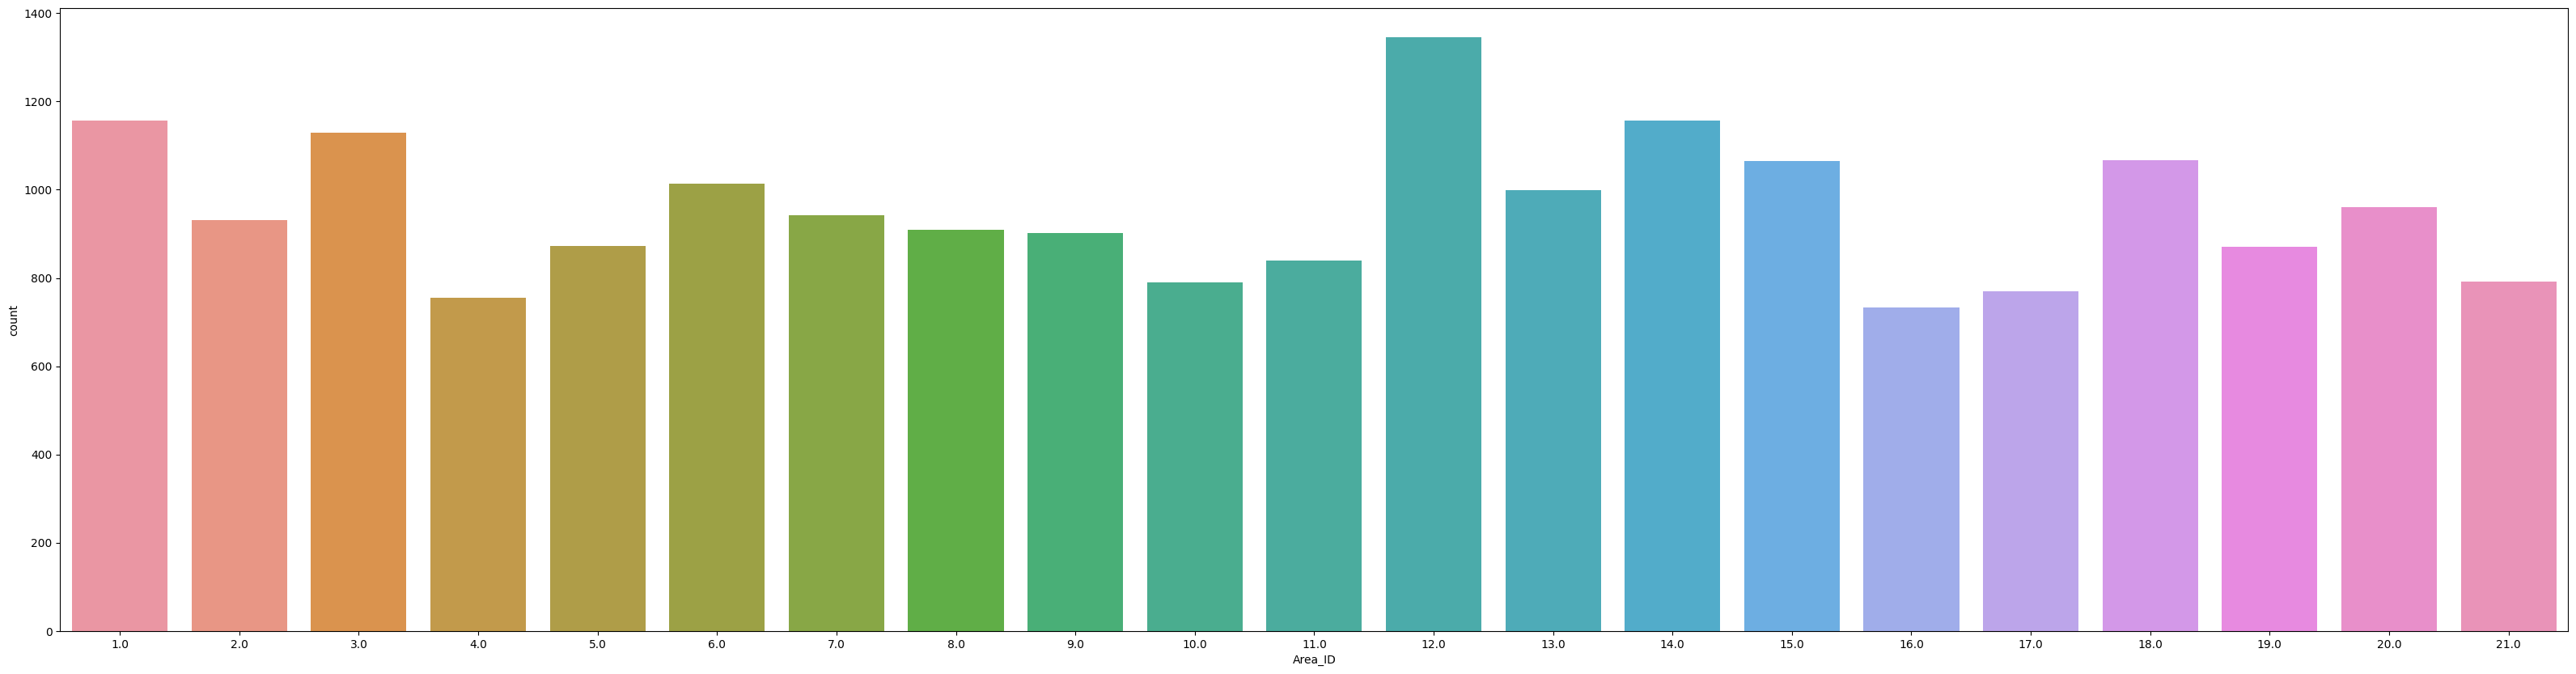

In [13]:
plt.subplots(figsize=(40, 10))
sns.countplot(x=train_df.Area_ID, data=train_df)

#### observation

* uniformly distributed data 

In [14]:
#train_df['Area_ID'].apply(str)
#test_df['Area_ID'].apply(str)

### Reporting_District_no

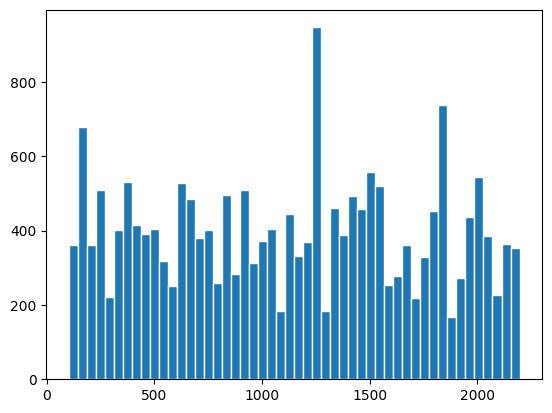

In [15]:

# plt.subplots(figsize=(20, 10))
# plt.subplot(2,2,1)
# sns.scatterplot(data=train_df, x='Latitude' y='Longitude' ,z='Reporting_District_no')
plt.hist(train_df['Reporting_District_no'],bins=50,ec='white')
#sns.distplot(train_df["Reporting_District_no"])
plt.show()

#### Reporting_District_no data is near to uniformly distributed 

### Part 1-2

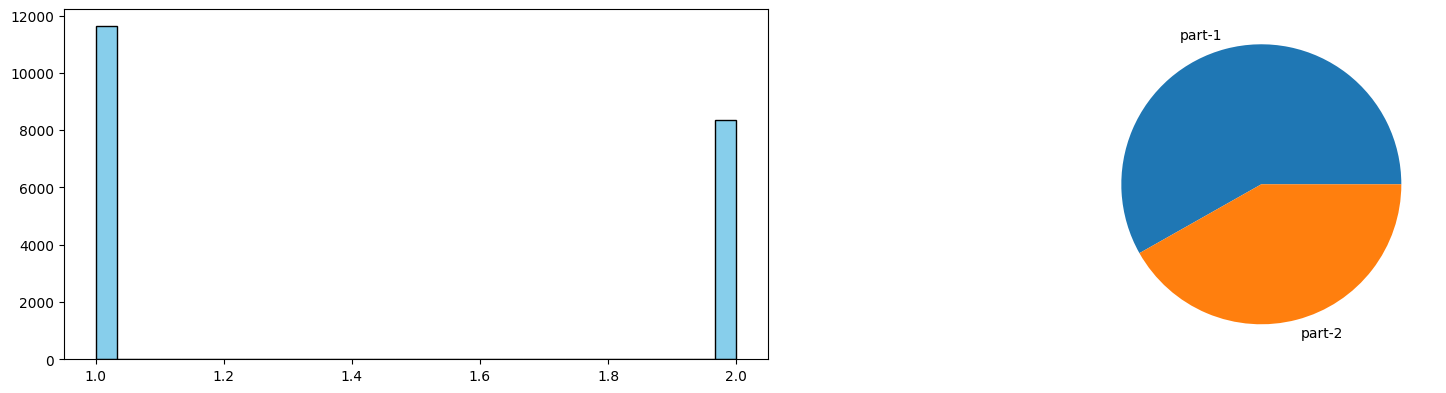

In [16]:
plt.subplots(figsize=(20, 10))
plt.subplot(2,2,1)
plt.hist(train_df['Part 1-2'], bins=30, color='skyblue', edgecolor='black')


# Creating dataset
#cars = ['AUDI', 'BMW', 'FORD',
#        'TESLA', 'JAGUAR', 'MERCEDES']

plt.subplot(2,2,2)


plt.pie([train_df['Part 1-2'].value_counts()[1],train_df['Part 1-2'].value_counts()[2]], labels=["part-1",'part-2'])
 
# show plot
plt.show()

#### have 2 unique values and part 1 is in majority

<h3>Victim age</h2>

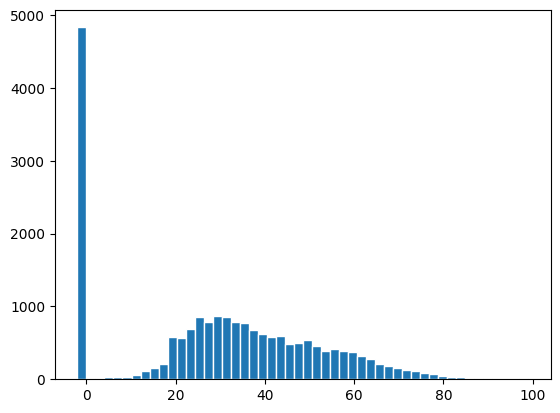

In [17]:
plt.hist(train_df['Victim_Age'],bins=50,ec='white')
plt.show()

#### observation

#### Data is right skewed due to age of 0 and less then 0 which should be preprocessed and age should be drag to above 0

In [18]:
# train_df["Victim_Age"]=train_df["Victim_Age"].replace(to_replace=[0,-1,-2,-3],value=1)
# test_df["Victim_Age"]=test_df["Victim_Age"].replace(to_replace=[0,-1,-2,-3],value=1)
train_df.loc[( (train_df['Victim_Age']<1)) , 'Victim_Age'] = 1
test_df.loc[( (test_df['Victim_Age']<1)) , 'Victim_Age'] = 1

### Premise_Code and Weapon_Used_Code

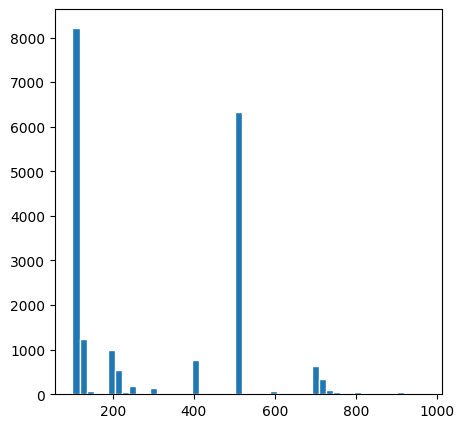

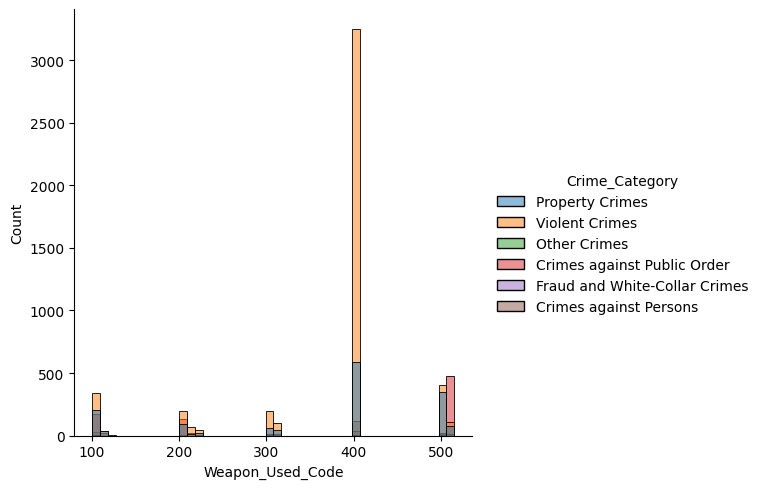

In [19]:
plt.subplots(figsize=(5,5))
plt.hist(train_df['Premise_Code'],bins=50,ec='white')
sns.displot(train_df,x='Weapon_Used_Code',hue="Crime_Category")
plt.show()

#### Observation
1. Contain null values as we seen in data info so data imputation will be peformed
2. premise code data is right skewed


## CATEGORICAL DATA

#### with less no. of categories

###  Victim_Sex

<Axes: xlabel='Status_Description', ylabel='count'>

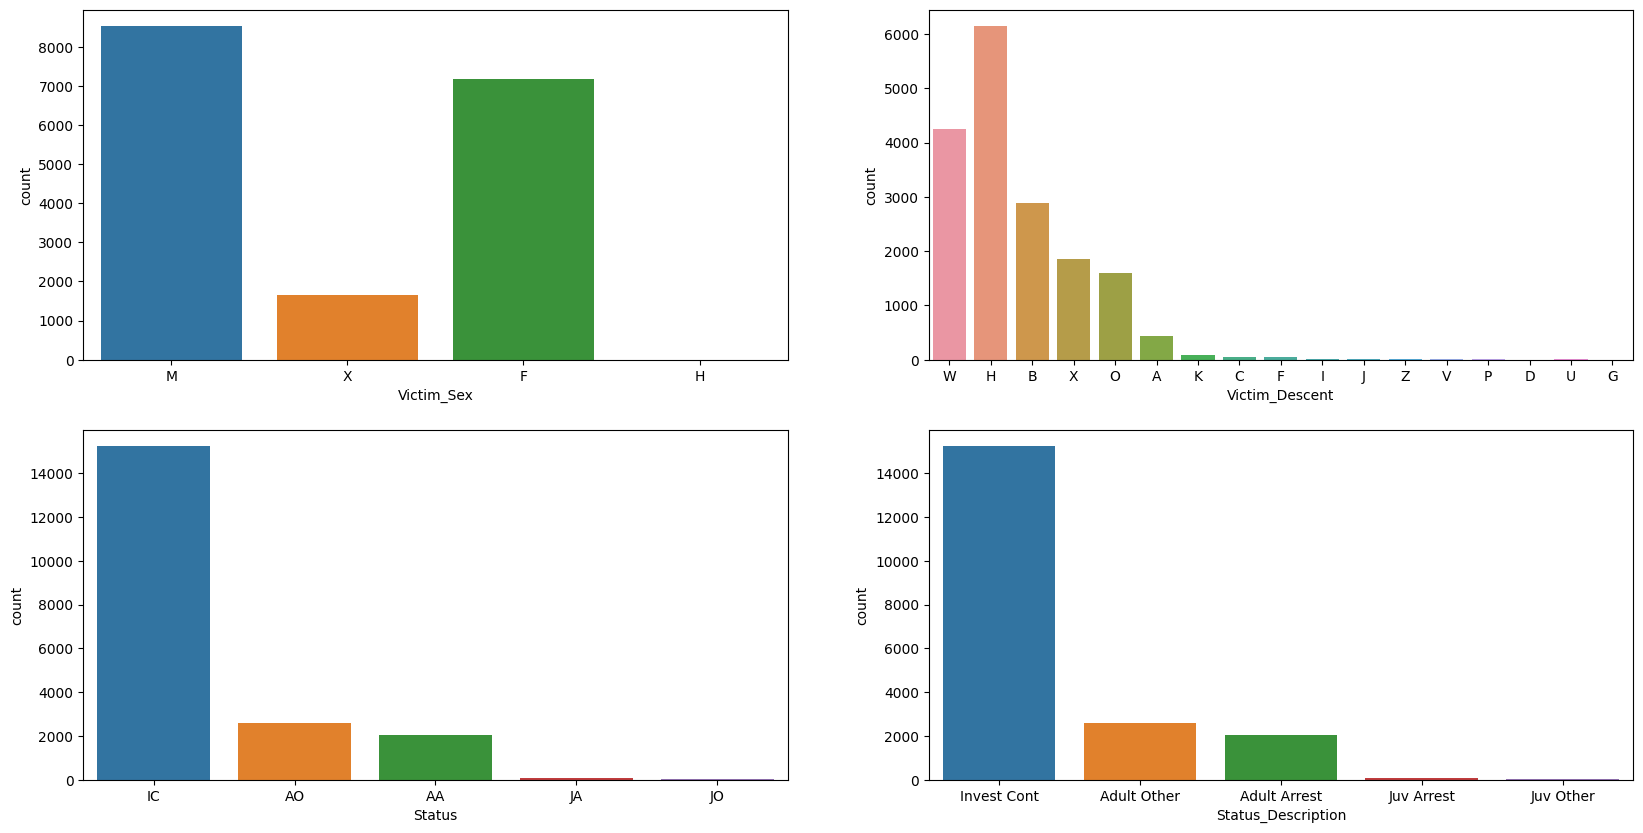

In [20]:
plt.subplots(figsize=(20, 10))
plt.subplot(2,2,1)
sns.countplot(x=train_df.Victim_Sex, data=train_df)
plt.subplot(2,2,2)
sns.countplot(x=train_df.Victim_Descent, data=train_df)
plt.subplot(2,2,3)
sns.countplot(x=train_df.Status, data=train_df)
plt.subplot(2,2,4)
sns.countplot(x=train_df.Status_Description, data=train_df)


#### observation
1. have 4 genders and max is male

#### with more no. of categories

In [21]:
col=['Location','Cross_Street','Area_Name','Modus_Operandi','Premise_Description','Weapon_Description']

for i in col:
    print(f"{i}:-{train_df[i].nunique()}")

Location:-12399
Cross_Street:-1495
Area_Name:-21
Modus_Operandi:-10489
Premise_Description:-216
Weapon_Description:-57



# FEATURE ENGINEERING

In [22]:
#CHANGING THE DATA TYPE OF DATA

#train data
train_df['Date_Reported'] = pd.to_datetime(train_df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
train_df['Date_Occurred'] = pd.to_datetime(train_df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')

#test data
test_df['Date_Reported'] = pd.to_datetime(test_df['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
test_df['Date_Occurred'] = pd.to_datetime(test_df['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')

In [23]:
Train_df=pd.DataFrame()
Test_df=pd.DataFrame()
#CREATING NEW COLUMNS FROM "DATE_OCCURRED"

Train_df['Year_Occ'] = train_df['Date_Occurred'].dt.year
Train_df['Month_Occ'] = train_df['Date_Occurred'].dt.month
Train_df['Day_Occ'] = train_df['Date_Occurred'].dt.day

Test_df['Year_Occ'] = test_df['Date_Occurred'].dt.year
Test_df['Month_Occ'] = test_df['Date_Occurred'].dt.month
Test_df['Day_Occ'] = test_df['Date_Occurred'].dt.day

#CREATING NEW COLUMNS FROM "DATE_REPORTED"
Train_df['Year_Rep'] = train_df['Date_Reported'].dt.year
Train_df['Month_Rep'] = train_df['Date_Reported'].dt.month
Train_df['Day_Rep'] = train_df['Date_Reported'].dt.day


Test_df['Year_Rep'] = test_df['Date_Reported'].dt.year
Test_df['Month_Rep'] = test_df['Date_Reported'].dt.month
Test_df['Day_Rep'] = test_df['Date_Reported'].dt.day

#CHANGING DATA 
train_df['Time_Occurred'] = train_df['Time_Occurred'].apply(lambda x: int(x// 100))
test_df['Time_Occurred'] = test_df['Time_Occurred'].apply(lambda x: int(x//100))

<Figure size 1000x1000 with 0 Axes>

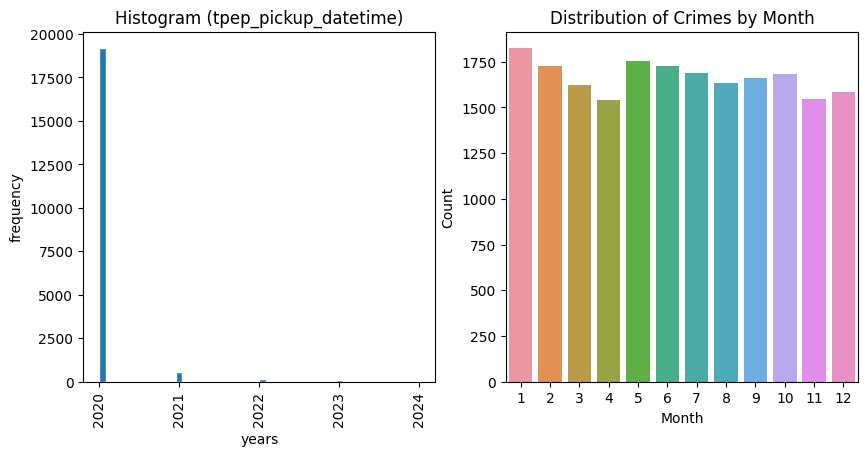

<Figure size 1000x1000 with 0 Axes>

In [24]:
plt.subplots(figsize=(10, 10))
plt.subplot(2,2,1)
plt.hist(Train_df['Year_Rep'],bins=50,ec='white')
plt.xlabel("years")
plt.ylabel("frequency")
plt.title('Histogram (tpep_pickup_datetime)')
plt.xticks(rotation='vertical')
# distribution of crimes by month
plt.subplot(2,2,2)
sns.countplot(x=Train_df.Month_Rep, data=train_df, )
plt.title('Distribution of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.figure(figsize = (10, 10))

# SEPARATING TARGET COLUMN

In [25]:
y=train_df["Crime_Category"]

train_df=train_df.drop(["Crime_Category"],axis=1)
#test_df=test_df.drop(['Date_Reported'],axis=1)

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
encoded_y = lab.fit_transform(y)

# FEATURE SELECTION

#### label encoding  column contain large value of categorical value

In [26]:
train_sel=train_df.copy()

In [27]:

def process_encode(data):
    #collecting numerical data index
    num_idx=data.columns.get_indexer(data.select_dtypes(['int64','float64']).columns)

    
    #making pipeline for numerical prepro
    num_est=[('imputer',KNNImputer(n_neighbors=4)),('scaler',MinMaxScaler())]
    num_pipe=Pipeline(steps=num_est)
    
    #appling pipeline
    transform=ColumnTransformer(transformers=[('num_process',num_pipe,num_idx)])
    numpy_data=transform.fit_transform(data)
    
    #droping numerical data from dataframe 
    after_numerical_prepro=pd.DataFrame(numpy_data, columns=data.columns[num_idx])
    cat=data.drop(data.columns[num_idx],axis=1)
    
    #combing prepro numerical in dataframe
    total_feature=pd.concat([after_numerical_prepro, cat],axis=1)
    total_feature=total_feature.drop(['Date_Reported','Date_Occurred'],axis=1)
    cat_idx = total_feature.select_dtypes('object').columns

    #lebel encoding categorical data
    label_encoders = {}

    for i in cat_idx:
        lE = LabelEncoder()
        total_feature[i] = lE.fit_transform(total_feature[i])
        label_encoders[i] = lE
    return total_feature


In [28]:
#APPLING LABLE ENCODING JUST TO SELECTING GOOD FEARTURE
train_select=process_encode(train_sel)

#COLLECTING SCORE OF EACH COLUMNS AS DATAFRAME
mi_score=pd.DataFrame(mutual_info_classif(train_select,y),index=train_select.columns,columns=["score"]).sort_values(by="score",ascending=False)#,columns=[["score"]])
#mi_score['score'].median

#COLLECTING SELECTED FEATURE
selected_feature=mi_score[mi_score["score"]>mi_score['score'].median()-0.001].index

#MI_SCORE OF EACH COLUMN
mutual_info_classif(train_select, y)


array([0.02376971, 0.0238286 , 0.01675889, 0.01163605, 0.02816441,
       0.21594976, 0.12916754, 0.15526191, 0.37695601, 0.04490491,
       0.01723093, 0.01585606, 0.74841059, 0.10376092, 0.12323899,
       0.14426503, 0.43723269, 0.09218462, 0.09011175])

### CORRELATON MATRIX

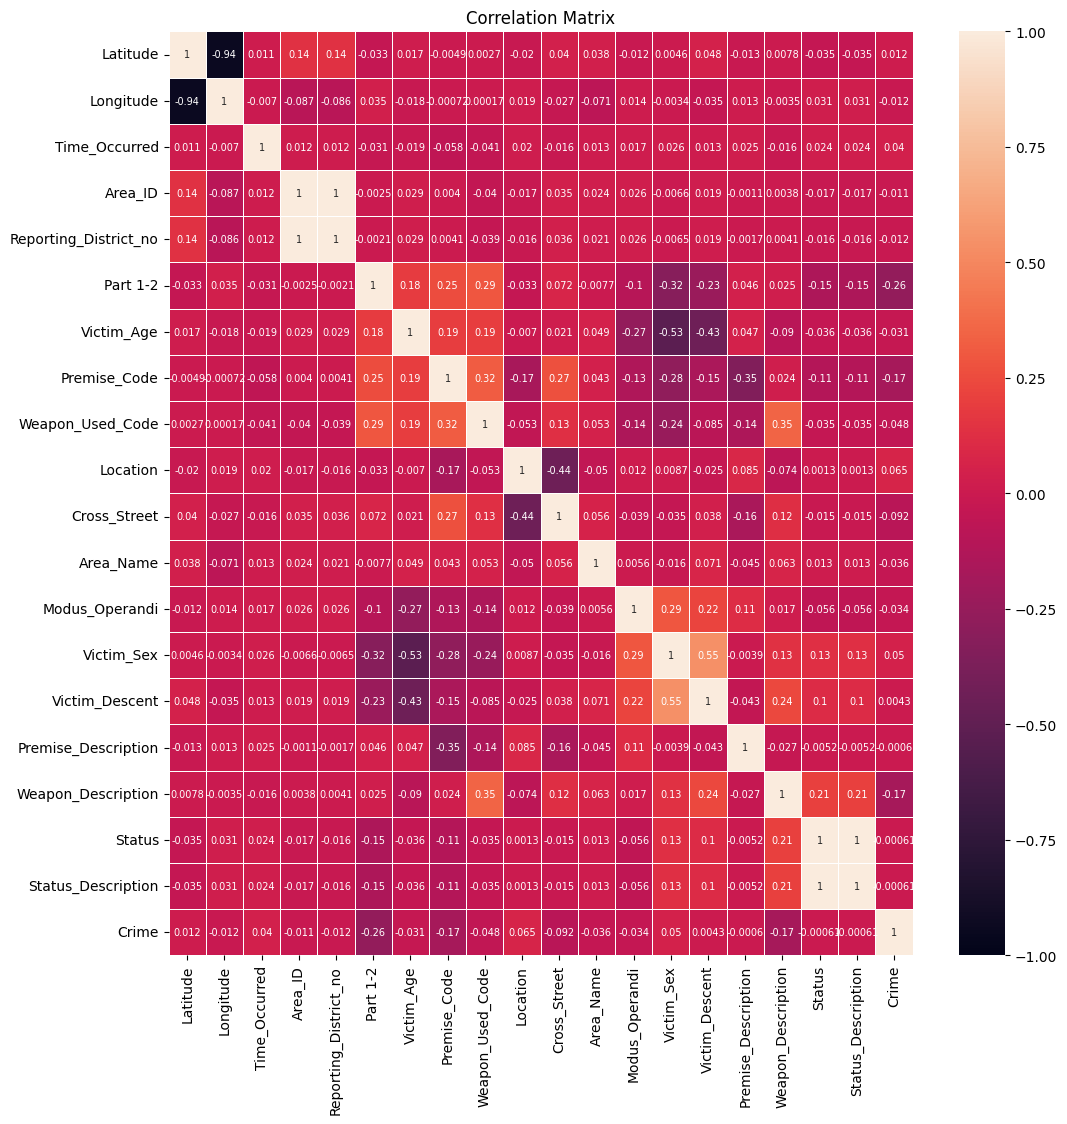

In [29]:
correlation_matrix = pd.concat([train_select,pd.DataFrame(encoded_y,columns=["Crime"])],axis=1).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True,  vmin=-1, vmax=1, linewidths=.5,annot_kws={"size": 7})
plt.title('Correlation Matrix')
plt.show()


* -1. indicates a perfectly negative linear correlation between two variables
* 0 indicates no linear correlation between two variables
* 1. indicates a perfectly positive linear correlation between two variables

In [30]:
#NAME OF SELECTED FEATURE
selected_feature

Index(['Modus_Operandi', 'Weapon_Description', 'Weapon_Used_Code', 'Part 1-2',
       'Premise_Code', 'Premise_Description', 'Victim_Age', 'Victim_Descent',
       'Victim_Sex', 'Status'],
      dtype='object')

#### Other way of feature selection drop due to low score

In [31]:
# from sklearn.feature_selection import SelectKBest, chi2, f_regression,MutualInformation
# selected_feature=SelectKBest(score_func=chi2,k=17).fit(train_select,encoded_y)
# sf_train=selected_feature.transform(total_features_without_selection)
# sf_test=selected_feature.transform(test_features_without_selection)
#selected_feature=selected_feature.get_feature_names_out()

In [32]:
#CARRYING FORWARD ONLY SLECTED VALUE
train_df=train_df[selected_feature]
test_df=test_df[selected_feature]

# DATA TRANSFORMATION

*FUNCTION FOR CLEANING TEXT COLUMN*

In [33]:
import re
import string
def text_clean(text):
    #text=text.str
    text=re.sub("[?\(\)#39,.!;&]",' ',text)
    text=re.sub('\[.*?\]',' ',text)
    text=re.sub('\\W',' ',text)
    text=re.sub('<.*?>+',' ',text)
    text_cleaned = re.sub(r'[^\w\s]', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation),' ',text)
    text=re.sub('\n',' ',text)
    text=re.sub('\w*\d\w*',' ',text)
    return text
cleaned=lambda x:text_clean(x)

*FUNCTION FOR TRANSFORMING  TEXT COLUMN*

In [34]:
#COLLECTING COLUMNS OF LARGE CATEGORICAL VALUE
filtered_columns = [col for col in train_df.columns if train_df[col].dtype == 'object' and train_df[col].nunique() >21]

#INSTILLIZING TRANSFORMFOR API


#CREATING BLANK DATAFRAME TO COLLECT TRANSFORMED DATA 
transformed_train_data=pd.DataFrame()
transformed_test_data=pd.DataFrame()

for col in filtered_columns:
    
        mbt= MultiLabelBinarizer() 
        #create boolean mask matched non NaNs values
        train_not_null_row = train_df[col].notnull()
        test_not_null_row = test_df[col].notnull()

        #filter by boolean indexing
        if col=='Modus_Operandi':
            train_arr = mbt.fit_transform(train_df.loc[train_not_null_row,col].dropna().str.strip('[]').str.split(' '))
            test_arr = mbt.transform(test_df.loc[test_not_null_row,col].dropna().str.strip('[]').str.split(' '))
        else:
            train_arr = mbt.fit_transform(train_df.loc[train_not_null_row ,col].dropna().apply(cleaned))
            test_arr = mbt.transform(test_df.loc[test_not_null_row ,col].dropna().apply(cleaned))
        col_name=[]
        for i in range(train_arr.shape[1]):
            col_name.append(f"{col}_{i}")
    
        #create DataFrame and add missing (NaN)s index values
        train_pre= pd.DataFrame(train_arr, index=train_df.index[train_not_null_row], columns=col_name).reindex(train_df.index, fill_value=0)
        test_pre= pd.DataFrame(test_arr, index=test_df.index[test_not_null_row], columns=col_name).reindex(test_df.index, fill_value=0)
        
        transformed_train_data=pd.concat([transformed_train_data,train_pre],axis=1)
        transformed_test_data=pd.concat([transformed_test_data,test_pre],axis=1)

### Categorical prepro 

In [35]:
def proc_cat_ohe_data(data1,test_data):
        cat_idx = [data1.columns.get_loc(col) for col in data1.select_dtypes(include=['object']).columns if data1[col].nunique() < 22]
        cat_idx_test_df=[test_data.columns.get_loc(col) for col in test_data.select_dtypes(include=['object']).columns if test_data[col].nunique() < 22]
        
        
        cat_est=[('imputer',SimpleImputer(strategy='most_frequent')),('Ordinal',OneHotEncoder(sparse=False, handle_unknown='ignore'))]
        cat_pipe=Pipeline(steps=cat_est) 
        
        transform=ColumnTransformer(transformers=[('cat_process',cat_pipe,cat_idx)])
        pro_cat_data1=transform.fit_transform(data1)
        pro_cat_test_data=transform.transform(test_data)
        
        cat_col_name=[]
        for i in data1.columns[cat_idx]:
            k=data1[f"{i}"].nunique()
            for j in range(k):
                 cat_col_name.append(f"{i}_OHE_{j}")
          #  cat_col_name.append(f"{i}_Encoded")
            
        cat_test_col_name=[]
        for i in test_data.columns[cat_idx_test_df]:
            k=test_data[f"{i}"].nunique()
            for j in range(k):
                cat_test_col_name.append(f"{i}_OHE_{j}")
          #  cat_test_col_name.append(f"{i}_Encoded")
        
        features_train_data=pd.DataFrame(pro_cat_data1, columns=cat_col_name)
        features_test_data=pd.DataFrame(pro_cat_test_data,columns=cat_col_name)
        
        return features_train_data,features_test_data

### numerical prepro

In [36]:
def proc_num_data(data,test_data):
    num_idx=data.columns.get_indexer(data.select_dtypes(['int64','float64']).columns)
    num_test_idx=test_data.columns.get_indexer(test_data.select_dtypes(['int64','float64']).columns)
    #for i in train_data.columns[num_idx]:
     #   if i=="Rating":
      #      data=data.drop("Rating",axis=1)
    #num_idx=data.columns.get_indexer(data.select_dtypes(['int64','float64']).columns)
    
    
    num_est=[('imputer',KNNImputer(n_neighbors=3)),('scaler',MinMaxScaler())]     
    num_pipe=Pipeline(steps=num_est)
    
    
    transform=ColumnTransformer(transformers=[('num_process',num_pipe,num_idx)])
    numpy_data=transform.fit_transform(data)
    numpy_test_data=transform.transform(test_data)
    
    
    train_features=pd.DataFrame(numpy_data, columns=data.columns[num_idx])
    test_features=pd.DataFrame(numpy_test_data, columns=test_data.columns[num_test_idx])
    return train_features,test_features

In [37]:
# APPLYING FUNCTION MADE FOR PREROCESSING WITH THE HELP OF PIPELINE
cat_train,cat_test=proc_cat_ohe_data(train_df,test_df)
num_train,num_test=proc_num_data(train_df,test_df)

In [38]:
#MAKING SINGLE DATAFRAME BY CANCAT ALL NUMERICAL CATEGIORICAL AND TIME/DATE  
total_features_without_selection=pd.concat([num_train,cat_train,transformed_train_data,Train_df],axis=1)
test_features_without_selection=pd.concat([num_test,cat_test,transformed_test_data,Test_df],axis=1)

## PCA VISULIZATION

In [39]:
 from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(train_select)

df=pd.DataFrame(principalComponents,columns=['pca1',"pac2",'pca3'])

import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df.pca1, y=df.pac2,z=df.pca3,
              color=encoded_y.astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()  

In [40]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.pca1,df.pac2,df.pca3])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[ 1.34839543e+07  9.26898571e-10  1.99312997e-11]
 [ 9.26898571e-10  1.27348246e+07 -2.60783360e-12]
 [ 1.99312997e-11 -2.60783360e-12  8.73908544e+04]]


In [41]:
# Step 3 - Finding EV and EVs
np.linalg.eig(covariance_matrix)

EigResult(eigenvalues=array([13483954.27712881, 12734824.56483313,    87390.85440941]), eigenvectors=array([[ 1.00000000e+00,  1.23730050e-15, -1.48779198e-18],
       [ 0.00000000e+00, -1.00000000e+00, -1.80265620e-19],
       [ 0.00000000e+00,  1.13609581e-17,  1.00000000e+00]]))

### Handling Data Imbalance

In [42]:

from imblearn.over_sampling import RandomOverSampler

#smote = SMOTE()
ros=RandomOverSampler()
total_features_without_selection, encoded_y = ros.fit_resample(total_features_without_selection, encoded_y)


<h3>Train test split</h3>

In [43]:
x_train,x_test,y_train,y_test=train_test_split(total_features_without_selection, encoded_y,test_size=0.20)

## BASELINE_MODEL

In [44]:
#FOR CROSSVALIDATION
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2)

#FUNCTION FOR TRIYING DIFFRENT VALUE OF BASE
def dummy_reg(strategy,constant_val=None,quantile_val=None):
    baseline_model_median=DummyRegressor(strategy=strategy,
                                        constant=constant_val,
                                        quantile=quantile_val)
    baseline_median_cv_results=cross_validate(baseline_model_median,
                                               total_features_without_selection,encoded_y,
                                               cv=shuffle_split_cv,
                                              scoring="accuracy",
                                             )#  n_jobs=2)
    return pd.Series(baseline_median_cv_results["test_score"],name="Dummy regressor score")

In [45]:
baseline_median_cv_results_score=dummy_reg(strategy="median")
#baseline_mean_cv_results_score=dummy_reg(strategy="mean")
baseline_constant_cv_results_score=dummy_reg(strategy="constant",constant_val=5)
baseline_quantile_cv_results_score=dummy_reg(strategy="quantile",quantile_val=0.5)

In [46]:
#CONSTRUCTING DATAFRAME 
dummy_score_df=pd.concat([baseline_median_cv_results_score,
                # baseline_mean_cv_results_score,
                 baseline_constant_cv_results_score,
                baseline_quantile_cv_results_score],axis=1)
dummy_score_df.columns=["Median",'Constant','Quantile'] 
dummy_score_df

,Median,Constant,Quantile
0,0.166929,0.170786,0.168786
1,0.168071,0.166786,0.158857
2,0.163786,0.171429,0.159071
3,0.165571,0.164643,0.168286
4,0.166500,0.168929,0.167429
5,0.164286,0.166214,0.160929
6,0.163857,0.167786,0.167714
7,0.162286,0.168071,0.163643
8,0.166143,0.169429,0.163429
9,0.164929,0.166429,0.167786


Text(0.5, 0, 'Accuracy_score')

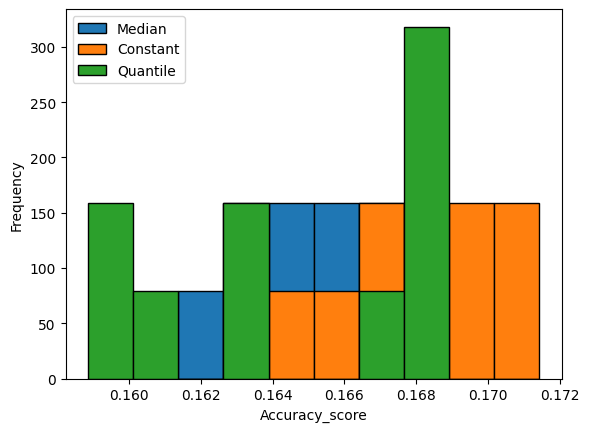

In [47]:
#VISUALLISATION OF SCORE
dummy_score_df.plot.hist(density=True,edgecolor="black")
plt.xlabel("Accuracy_score")

### function to compare each model

In [48]:
def score(y_test,y_pre_reg):
    print(f'Accuracy : {accuracy_score(y_test, y_pre_reg)}\n'
        f"r2_score : {r2_score(y_test, y_pre_reg)}\n"
          #f"mean_sq_error : {mean_squared_error(y_test, y_pre_reg)}\n"
         #f"mean_abs_error: {mean_absolute_error(y_test,y_pre_reg)}"
         )

#### Function to make crossvalidation graph

In [49]:
def train_regressor(estimator, name):
    estimator.fit(x_train,y_train)
    print(f'The score on train data is: {estimator.score(x_train,y_train)}\n')
    print(f'The score on validation data is: {estimator.score(x_test, y_test)}\n')
    
    cv_results = cross_validate(estimator,
                                x_train,
                                y_train, 
                              cv=5,
                              scoring='r2',
                              return_train_score=True,
                              return_estimator=True)

    cv_train_score = cv_results['train_score']
    cv_test_score = cv_results['test_score']

    print(f"On an average, {name} gives score of "
        f"{cv_train_score.mean():.3f}k +/- {cv_train_score.std():.3f}k on the training set.\n")
    print(f"On an average, {name} gives score of "
        f"{cv_test_score.mean():.3f}k +/- {cv_test_score.std():.3f}k on the validation set.\n")
    plt.figure(figsize=(5, 4))
    plt.plot(np.arange(1, 6), cv_train_score, label='Train Score', marker='o')
    plt.plot(np.arange(1, 6), cv_test_score, label='Test Score', marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Mean Absolute Error')
    plt.title('Train and Test Error Across Folds')
    plt.legend()
    plt.show()

In [50]:
def confusion(true_labels,predicted_labels):

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
   

    # Create a DataFrame for a better visualization
    cm_df = pd.DataFrame(cm, index=['Class 0', 'Class 1', 'Class 2',"Class 3","Class 4","Class 5"], columns=['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3','Predicted 4','Predicted 5'])

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

#### Dataframe for model comparision

In [51]:
cols_results=['Model','Accuracy_rate','Runtime']
results = pd.DataFrame(columns=cols_results)
results 

,Model,Accuracy_rate,Runtime


In [52]:
results

,Model,Accuracy_rate,Runtime


## LOG REGRESSOR CLASSIFICIER

In [53]:
#BASE MODEL 
log_base=LogisticRegression()

#### Hypertuning of log model

In [54]:
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=97)
# param_grid={
    
#      "max_iter":[100,500,1000],
#      "solver":["lbfgs","liblinear","newton-cg","sag","saga"],
#      "penalty":["l1","l2","none"],
#      "C":[1,10,20]
    
#  }

# log_tuned_model = RandomizedSearchCV(estimator=log_base,
#                     param_distributions=param_grid,
#                      cv=cv, refit = True, verbose = 3)

# log_tuned_model.fit(x_train, y_train)

In [55]:
#BEST CHOSEN PARAMETER
#log_tuned_model.best_params_

#### {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 500, 'C': 1}

In [56]:
# hypertuned model of log classifier
time_start = time.time()
Best_log_model=LogisticRegression(C=10, max_iter=100, penalty="l2", solver="newton-cg")
Best_log_model.fit(x_train,y_train)
Log_y_pred=Best_log_model.predict(x_test)

time_run = time.time()-time_start
result = pd.DataFrame([['LOG',accuracy_score(y_test,Log_y_pred),time_run]],columns=cols_results)
results = pd.concat([results,result],axis=0)

In [57]:
#CLASSIFICATION REPORT
print(classification_report(Log_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2423
           1       0.83      0.91      0.87      2201
           2       0.96      0.96      0.96      2310
           3       0.95      0.86      0.90      2513
           4       0.96      0.98      0.97      2311
           5       0.91      0.95      0.93      2242

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



In [58]:
#MODEL SCORE
score(y_test,Log_y_pred)

Accuracy : 0.9323571428571429
r2_score : 0.8216428518859825



r2_score : 0.6401103213749623
mean_sq_error : 0.5253030303030303
mean_abs_error: 0.15651515151515152
r2_score : 0.6528782563247401
mean_sq_error : 0.5066666666666667
mean_abs_error: 0.15121212121212121

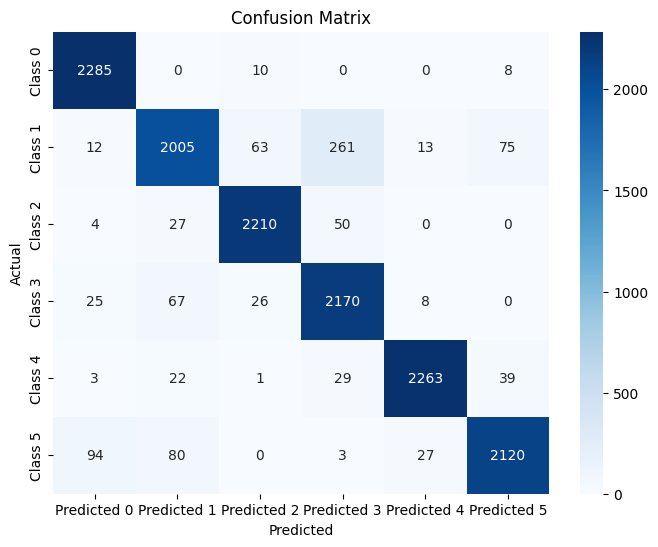

In [59]:
confusion(y_test,Log_y_pred)

In [60]:
#train_regressor(Best_log_model,"LOG CLASSIFIER")

## K Nearest Neighbour

In [61]:
#BASE MODEL OF KNN
KNN_base = KNeighborsClassifier()

#### Hypertuning of  KNN model

In [62]:
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=97)
# grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
#                'weights' : ['uniform','distance'],
#                'metric' : ['minkowski','euclidean','manhattan']}

# Gs_Knn= GridSearchCV(KNN_base, grid_params, verbose = 1, cv=cv, n_jobs = -1,refit = True)

# Gs_Knn.fit(x_train, y_train)

In [63]:
#BEST CHOSEN PARAMETER
#Gs_Knn.best_params_

#### {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [64]:
# hypertuned model of KNN
time_start = time.time()
Best_Knn_Model=KNeighborsClassifier( metric='manhattan',n_neighbors= 5, weights= 'distance')
Best_Knn_Model.fit(x_train,y_train)
Knn_y_pred=Best_Knn_Model.predict(x_test)


time_run = time.time()-time_start
result = pd.DataFrame([['KNearestNeighbour',accuracy_score(y_test,Knn_y_pred),time_run]],columns=cols_results)
results = pd.concat([results,result],axis=0)

In [65]:
#CLASSIFICATION REPORT
print(classification_report(Knn_y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2327
           1       1.00      0.93      0.96      2597
           2       1.00      0.93      0.97      2452
           3       1.00      0.99      0.99      2325
           4       0.78      0.99      0.87      1860
           5       0.97      0.92      0.95      2439

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.97      0.96      0.96     14000



In [66]:
#MODEL SCORE
score(y_test,Knn_y_pred)

Accuracy : 0.9576428571428571
r2_score : 0.9207519248528133



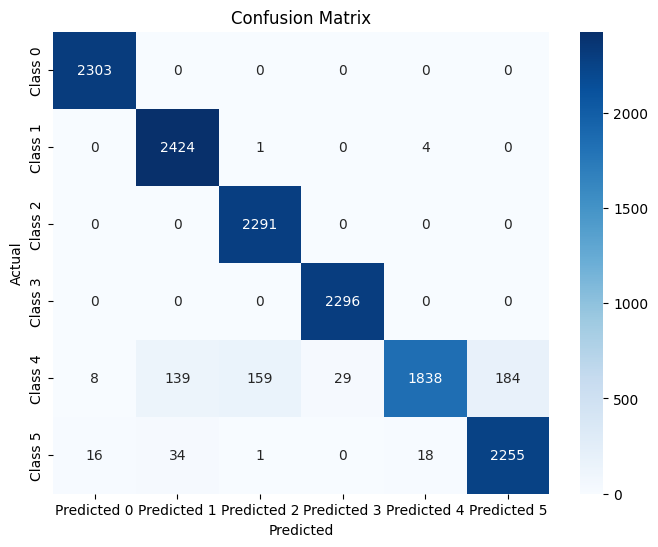

In [67]:
confusion(y_test,Knn_y_pred)

In [68]:
#train_regressor(Best_Knn_Model,"KNN")

## DECISION TREE

In [69]:
#BASE MODEL OF DECISION TREE
Decision_tree_base = DecisionTreeClassifier() 

#### Hypertuning of decision tree model

In [70]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # parameter matrix
# param_grid = {
#     'max_depth': range(1, 10, 2),
#     'min_samples_leaf': range(1, 20, 3),
#     'min_samples_split': range(2, 20, 3),
#     'criterion': ["entropy", "gini"]
# }
# # GridSearchCV
# grid_search = GridSearchCV(estimator=Decision_tree_base, param_grid=param_grid, 
#                            cv=kf,
#                            verbose=True)
# grid_search.fit(x_train, y_train)



In [71]:
#BEST CHOSEN PARAMETER
#print("best accuracy", grid_search.best_score_)
#print(grid_search.best_estimator_)


#### DecisionTreeClassifier(max_depth=9, min_samples_split=19,criterion="entropy")

In [72]:
# hypertuned model of Dtree_model
time_start = time.time()
Best_dtree_model = DecisionTreeClassifier(max_depth = 9,min_samples_split=19,criterion="entropy",min_samples_leaf=5).fit(x_train, y_train) 
Dtree_y_pred = Best_dtree_model.fit(x_train, y_train)

# making predictions on the testing set
Dtree_y_pred = Best_dtree_model.predict(x_test) 
time_run = time.time()-time_start
result = pd.DataFrame([['DecisionTreeClassifier',accuracy_score(y_test,Dtree_y_pred),time_run]],columns=cols_results)
results = pd.concat([results,result],axis=0)

In [73]:
#CLASSIFICATION REPORT
print(classification_report(Dtree_y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2417
           1       0.66      0.90      0.76      1801
           2       0.93      0.73      0.81      2926
           3       0.80      0.80      0.80      2307
           4       0.95      0.98      0.97      2279
           5       0.89      0.91      0.90      2270

    accuracy                           0.87     14000
   macro avg       0.87      0.88      0.87     14000
weighted avg       0.88      0.87      0.87     14000



In [74]:
#MODEL SCORE
score(y_test,Dtree_y_pred)

Accuracy : 0.8699285714285714
r2_score : 0.774622980352423



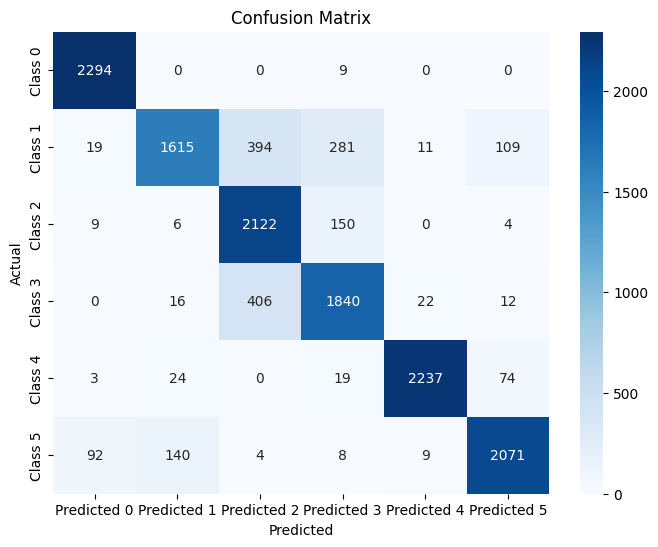

In [75]:
confusion(y_test,Dtree_y_pred)

In [76]:
#train_regressor(Best_dtree_model,"log")

## GaussianNB model

In [77]:
#BASE MODEL OF GaussianNB
Gnb_base = GaussianNB()

#### Hypertuning of  GaussianNB model

In [78]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# gs_NB = GridSearchCV(estimator=Gnb_base, 
#                      param_grid=params_NB, 
#                      cv=kf,
#                      verbose=1, 
#                      scoring='accuracy')

#Data_transformed = PowerTransformer().fit_transform(x_train)


In [79]:
#BEST CHOSEN PARAMETER
#gs_NB.best_param_

#### { 'var_smoothing'=0.008111308307896872 }

In [80]:
# hypertuned model of GaussianNB
time_start = time.time()
Best_gnb_model = GaussianNB(var_smoothing=0.008111308307896872)
Best_gnb_model.fit(x_train, y_train)
  
# making predictions on the testing set
Gnb_y_pred = Best_gnb_model.predict(x_test)
time_run = time.time()-time_start
result = pd.DataFrame([['GaussianNB',accuracy_score(y_test,Gnb_y_pred),time_run]],columns=cols_results)
results = pd.concat([results,result],axis=0)  


In [81]:
#CLASSIFICATION REPORT
print(classification_report(Gnb_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.37      0.90      0.52       935
           1       0.29      0.57      0.39      1248
           2       0.87      0.42      0.57      4704
           3       0.59      0.58      0.58      2346
           4       0.64      0.69      0.67      2192
           5       0.72      0.65      0.68      2575

    accuracy                           0.58     14000
   macro avg       0.58      0.64      0.57     14000
weighted avg       0.67      0.58      0.59     14000



In [82]:
#MODEL SCORE
score(y_test,Gnb_y_pred)

Accuracy : 0.5773571428571429
r2_score : 0.09521032620891245



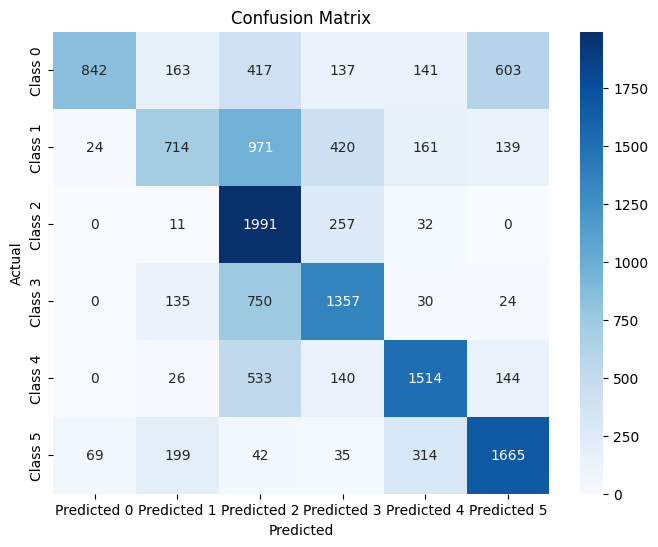

In [83]:
confusion(y_test,Gnb_y_pred)

In [84]:
#train_regressor(Best_gnb_model,"GaussianNB")

### Support Vector Machine Model

In [85]:
#BASE MODEL OF SVM 
Svm_base = SVC()

#### Hypertuning of  SVM model

In [86]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf']}  
  
# grid = GridSearchCV(Svm_base, param_grid,cv=kf, refit = True, verbose = 3) 
  
# # fitting the model for grid search 
# grid.fit(x_train, y_train) 

In [87]:
# print best parameter after tuning 
#print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
#print(grid.best_estimator_)

#### { 'kernel':'rbf', 'gamma':0.0001, 'C':1000}

In [88]:
# hypertuned model of  SVM
time_start = time.time()
Best_svm_model = SVC(kernel="rbf", gamma=0.0001, C=1000)
Best_svm_model.fit(x_train, y_train) 

# making predictions on the testing set
Svm_y_pred = Best_svm_model.predict(x_test)
time_run = time.time()-time_start
result = pd.DataFrame([['SupportVectorMachine',accuracy_score(y_test,Svm_y_pred),time_run]],columns=cols_results)
results = pd.concat([results,result],axis=0)  


In [89]:
#CLASSIFICATION REPORT
print(classification_report(Svm_y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2392
           1       0.87      0.93      0.90      2258
           2       0.97      0.97      0.97      2294
           3       0.98      0.91      0.94      2489
           4       0.97      0.99      0.98      2312
           5       0.92      0.95      0.94      2255

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



In [90]:
#MODEL SCORE
score(y_test,Svm_y_pred)

Accuracy : 0.9495
r2_score : 0.8543118667952369



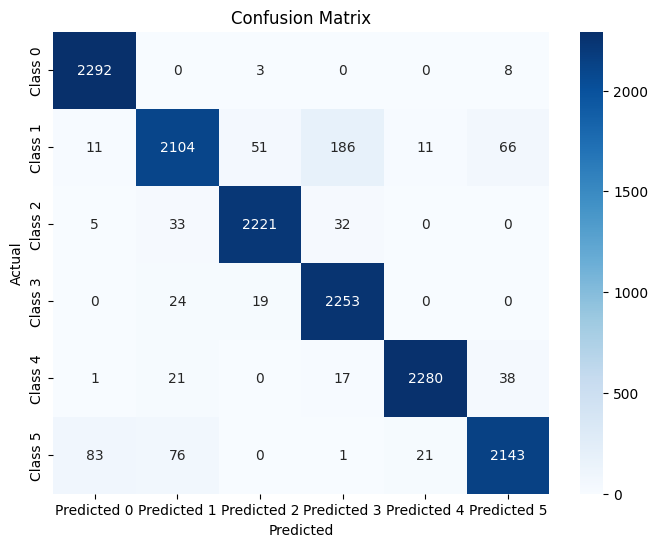

In [91]:
confusion(y_test,Svm_y_pred)

In [92]:
#train_regressor(Best_svm_model,"Support_Vector_Machine")

## Bagging

## RandomForestClassifier model

In [93]:
#BASE MODEL 
RFC_base = RandomForestClassifier()

#### Hypertuning of RFC model

In [94]:
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=97)
# param_grid = { 
#     'n_estimators': [25, 50, 100, 150], 
#     'max_features': ['sqrt', 'log2', None], 
#     'max_depth': [33, 36, 39], 
#     'max_leaf_nodes': [33, 36, 39], 
# } 

# grid_search = GridSearchCV(RFC_base, 
#                            param_grid=param_grid,cv=cv ,refit = True, verbose = 3) 
# grid_search.fit(x_train, y_train)


In [95]:
#BEST CHOSEN PARAMETER
#grid_search.best_estimator_

#### { 'n_splits':5, 'test_size':0.2, 'random_state':97 }

In [96]:
# hypertuned model of RFC
time_start = time.time()
Best_rfc_model = RandomForestClassifier(  max_depth=39, max_features=40, max_leaf_nodes=39, n_estimators=25)
Best_rfc_model.fit(x_train,y_train)
Rcf_y_pred=Best_rfc_model.predict(x_test)

time_run = time.time()-time_start
result = pd.DataFrame([['RandomForestClassifier',accuracy_score(y_test,Rcf_y_pred),time_run]],columns=cols_results)
results = pd.concat([results,result],axis=0)

In [97]:
#CLASSIFICATION REPORT
print(classification_report(Rcf_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2371
           1       0.60      0.80      0.69      1833
           2       0.90      0.75      0.82      2729
           3       0.72      0.71      0.72      2338
           4       0.84      0.92      0.88      2133
           5       0.87      0.77      0.82      2596

    accuracy                           0.80     14000
   macro avg       0.80      0.81      0.80     14000
weighted avg       0.82      0.80      0.81     14000



In [98]:
#MODEL SCORE
score(y_test,Rcf_y_pred)

Accuracy : 0.8029285714285714
r2_score : 0.549343918770541



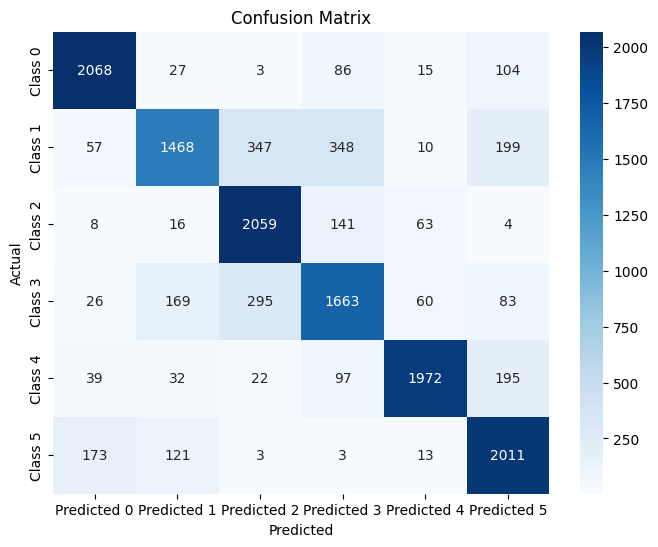

In [99]:
confusion(y_test,Rcf_y_pred)

In [100]:
#train_regressor(Best_rfc_model,"RandomForestClassifier")

## BOOSTING

##  xgboost Model

In [101]:
#BASE MODEL OF XGB 
Xgb = xgb.XGBClassifier()

#### Hypertuning of xgboost

In [102]:
# params = {
#     'eta': [0.1, 0.3, 0.5],
#     'max_depth': [3, 6, 9],
#     'min_child_weight': [1, 3, 5], 
#     'subsample': [0.5, 0.8, 1.0],
#     'colsample_bytree': [0.5, 0.8, 1.0]
# }

# #xgb = XGBRegressor()

# grid_search = GridSearchCV(Xgb, 
#                            param_grid=params,
                           
#                            cv=5,
#                            verbose=3, 
#                            scoring='accuracy',refit = True)

# grid_search.fit(x_train,y_train)

In [103]:
# print best parameter after tuning 
# grid_search.best_params_

#### {'colsample_bytree': 1.0, 'eta': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}

In [104]:
#colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.993
#colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.995

In [105]:
# hypertuned model of  xgboost
time_start = time.time()
Xgb_best = xgb.XGBClassifier(colsample_bytree= 0.8,
 eta= 0.3,
 max_depth= 9,
 min_child_weight= 1,
 subsample=0.8,
)
Xgb_best.fit(x_train,y_train)

# Make prediction on the testing data
Xgb_best_y_pred = Xgb_best.predict(x_test)

time_run = time.time()-time_start
result = pd.DataFrame([['xgboost',accuracy_score(y_test,Xgb_best_y_pred),time_run]],columns=cols_results)
results = pd.concat([results,result],axis=0)  

In [106]:
# Classification Report
print(classification_report(Xgb_best_y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2307
           1       1.00      0.99      1.00      2450
           2       1.00      1.00      1.00      2291
           3       1.00      1.00      1.00      2299
           4       0.98      1.00      0.99      2312
           5       0.99      0.98      0.99      2341

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



In [107]:
#MODEL SCORE
score(y_test,Xgb_best_y_pred)

Accuracy : 0.9952142857142857
r2_score : 0.9898368506841525



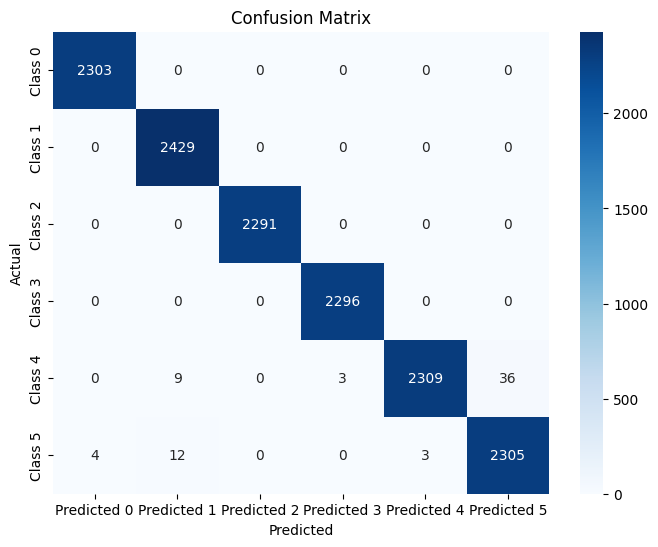

In [108]:
confusion(y_test,Xgb_best_y_pred)

In [109]:
#train_regressor(Xgb_best,"xgboost")

## GradientBoostingClassifier

In [110]:

# gbc_model = GradientBoostingClassifier()
# gbc_model.fit(x_train,y_train)

In [111]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
# }
 
# # Initialize the Gradient Boosting model
# gb_model = GradientBoostingClassifier()
 
# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy',refit = True, verbose = 3)
 
# # Fit the model to the training data using GridSearchCV
# grid_search.fit(x_train, y_train)
 

In [112]:
# Xgb_best = xgb.XGBClassifier(colsample_bytree= 1.0,
#  eta= 0.5,
#  max_depth= 4,
#  min_child_weight= 0,
#  subsample=1.0,
# )
# Xgb_best.fit(x_train,y_train)

In [113]:
# print("learning_rate=0.1, max_depth=5, n_estimators=200;")

In [114]:
# # Get the best parameters and best model
#grid_search.best_params_

#best_model = grid_search.best_estimator_

In [115]:
# gbc_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=10)
# gbc_model.fit(x_train,y_train)


In [116]:
# # Make prediction on the testing data
# gbc_y_pred = gbc_model.predict(x_val)
# /
# # Classification Report
# print(classification_report(gbc_y_pred, y_val))

In [117]:
# reg_score(y_val,gbc_y_pred)

In [118]:
# accuracy_score(y_val, gbc_y_pred)

## Multilayer perceptron model

In [119]:
#BASE MODEL OF XGB 
Mlp_base = MLPClassifier()

#### Hypertuning of MLP

In [120]:
# parameter_space = {
  
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
#     'max_iter':[100,200,300],
# }

# clf = GridSearchCV(Mlp_base, parameter_space, scoring='accuracy',refit = True, verbose = 3, cv=5)
# clf.fit(x_train, y_train)

In [121]:
# Get the best parameters and best model
#clf.best_params_

#### {'activation': 'relu','alpha': 0.0001,'learning_rate': 'constant','max_iter': 200, 'solver': 'adam'}

In [122]:
# hypertuned model of  xgboost
time_start = time.time()
Best_mlp_model = MLPClassifier(activation= 'relu',alpha= 0.0001,learning_rate= 'constant',max_iter=200, solver= 'adam')
Best_mlp_model.fit(x_train,y_train)

# Make prediction on the testing data
Mlp_y_pred = Best_mlp_model.predict(x_test)

time_run = time.time()-time_start
result = pd.DataFrame([['Multilayerperceptron',accuracy_score(y_test,Mlp_y_pred),time_run]],columns=cols_results)
results = pd.concat([results,result],axis=0)  

In [123]:
# #Classification_Report
print(classification_report(Mlp_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2071
           1       0.90      0.91      0.90      2389
           2       0.97      0.94      0.95      2368
           3       0.97      0.89      0.93      2499
           4       0.94      0.99      0.97      2231
           5       0.95      0.90      0.93      2442

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



In [124]:
#MODEL SCORE
score(y_test,Mlp_y_pred)

Accuracy : 0.9353571428571429
r2_score : 0.7969084402980163



# Comparing different mode 

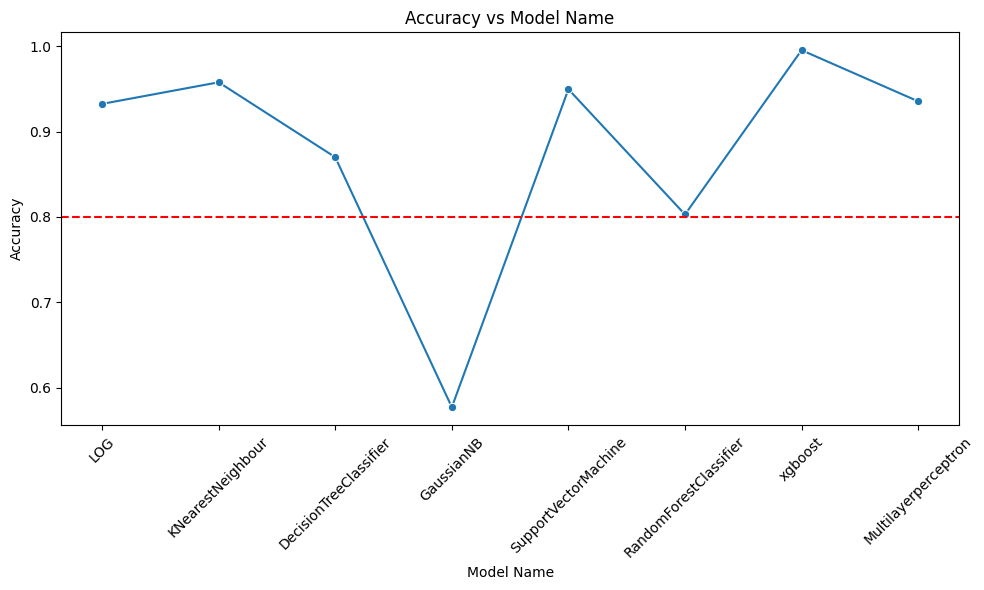

In [125]:
#plt.plot(results["Model"], results, label='Accuracy_rate', )
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Accuracy_rate', data=results,marker='o')
plt.axhline(y=0.8, color='red', linestyle='--') 
plt.xticks(rotation=45)
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model Name')
plt.tight_layout()
plt.show()

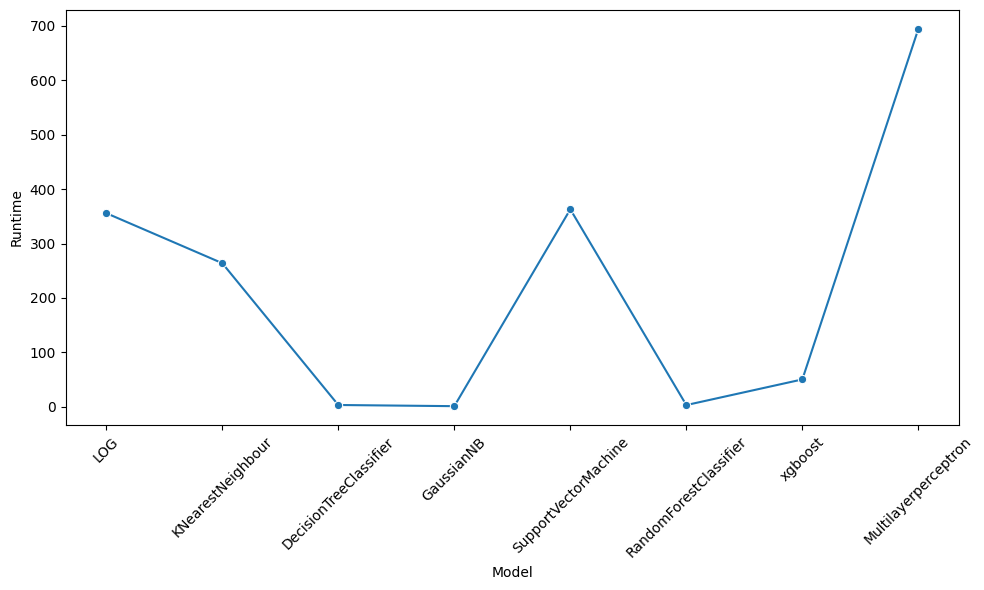

In [126]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Runtime', data=results,marker='o')
plt.xticks(rotation=45)
plt.tight_layout()

In [127]:
results

,Model,Accuracy_rate,Runtime
0,LOG,0.932357,355.769793
0,KNearestNeighbour,0.957643,263.862384
0,DecisionTreeClassifier,0.869929,3.288536
0,GaussianNB,0.577357,1.135416
0,SupportVectorMachine,0.949500,362.879685
0,RandomForestClassifier,0.802929,3.161599
0,xgboost,0.995214,50.282440
0,Multilayerperceptron,0.935357,694.394959


<h3>test_prediction</h3>

In [128]:
#final_dum_pre=dum_reg.predict(total_test_features)
y_test_encoded_pred =Xgb_best.predict(test_features_without_selection)
#final_knn_pred = KNN.predict(test_features_ohe_with_selection)
#final_dtree_pred = dtree_model.predict(test_features_ohe_with_selection)
#predictions = model.predict(total_test_features)
#final_reg_pre = reg.predict(total_test_features)
#final_svm_pred=svm.predict(test_features_ohe_with_selection)
#final_clf_pred= gbc.predict(test_features_ohe_without_selection)

In [129]:
submission=pd.DataFrame({"ID":np.arange(1,5001),
                         "Crime_Category":
                         y_test_encoded_pred
                        })


In [130]:
convert={0:'Crimes against Persons',1: 'Crimes against Public Order',
       2:'Fraud and White-Collar Crimes',3: 'Other Crimes',4:'Property Crimes',
       5:'Violent Crimes'}
submission["Crime_Category"]=submission["Crime_Category"].map(convert)

In [131]:
submission.to_csv("submission.csv",index=False)

log

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=10, max_iter=100, penalty=none, solver=saga;, score=0.587 total time=   2.4s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=saga;, score=0.603 total time=   2.4s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=saga;, score=0.586 total time=   2.4s
[CV 4/5] END C=10, max_iter=100, penalty=none, solver=saga;, score=0.568 total time=   2.4s
[CV 5/5] END C=10, max_iter=100, penalty=none, solver=saga;, score=0.584 total time=   2.5s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.632 total time=  20.1s
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.649 total time=  20.1s
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.641 total time=  20.2s
[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.621 total time=  20.1s
[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.633 total time=  20.2s
[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.781 total time= 4.8min
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.804 total time= 4.7min
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.791 total time= 4.7min
[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.792 total time= 4.9min
[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.789 total time= 4.6min
[CV 1/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.600 total time=  23.5s
[CV 2/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.619 total time=  23.4s
[CV 3/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.604 total time=  23.4s
[CV 4/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.592 total time=  23.3s
[CV 5/5] END C=10, max_iter=1000, penalty=none, solver=saga;, score=0.603 total time=  23.4s
[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.776 total time=  47.9s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.799 total time=  37.1s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.777 total time=  36.8s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.775 total time=  33.4s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.786 total time=  43.6s
[CV 1/5] END C=20, max_iter=100, penalty=none, solver=newton-cg;, score=0.778 total time=  12.9s
[CV 2/5] END C=20, max_iter=100, penalty=none, solver=newton-cg;, score=0.801 total time=  15.4s
[CV 3/5] END C=20, max_iter=100, penalty=none, solver=newton-cg;, score=0.791 total time=  14.4s
[CV 4/5] END C=20, max_iter=100, penalty=none, solver=newton-cg;, score=0.790 total time=  15.3s
[CV 5/5] END C=20, max_iter=100, penalty=none, solver=newton-cg;, score=0.787 total time=  15.0s
[CV 1/5] END C=20, max_iter=1000, penalty=l1, solver=liblinear;, score=0.776 total time=  59.8s
[CV 2/5] END C=20, max_iter=1000, penalty=l1, solver=liblinear;, score=0.799 total time=  39.6s
[CV 3/5] END C=20, max_iter=1000, penalty=l1, solver=liblinear;, score=0.776 total time=  32.2s
[CV 4/5] END C=20, max_iter=1000, penalty=l1, solver=liblinear;, score=0.774 total time=  42.3s
[CV 5/5] END C=20, max_iter=1000, penalty=l1, solver=liblinear;, score=0.785 total time= 1.1min
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.596 total time=   2.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.618 total time=   2.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.595 total time=   2.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.586 total time=   2.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.594 total time=   2.0s
[CV 1/5] END C=1, max_iter=500, penalty=none, solver=newton-cg;, score=0.782 total time= 2.0min
[CV 2/5] END C=1, max_iter=500, penalty=none, solver=newton-cg;, score=0.806 total time= 2.0min
[CV 3/5] END C=1, max_iter=500, penalty=none, solver=newton-cg;, score=0.792 total time= 2.1min
[CV 4/5] END C=1, max_iter=500, penalty=none, solver=newton-cg;, score=0.793 total time= 2.1min
[CV 5/5] END C=1, max_iter=500, penalty=none, solver=newton-cg;, score=0.790 total time= 2.0min


rfc

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.862 total time=   0.3s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.838 total time=   0.3s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.848 total time=   0.3s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.866 total time=   0.3s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.847 total time=   0.3s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.849 total time=   0.5s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.852 total time=   0.6s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.852 total time=   0.5s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.841 total time=   0.5s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.847 total time=   0.5s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.859 total time=   1.0s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.852 total time=   1.1s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.854 total time=   1.1s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.850 total time=   1.1s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.847 total time=   1.1s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.849 total time=   1.5s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.853 total time=   1.6s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.849 total time=   1.6s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.850 total time=   1.6s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.851 total time=   1.6s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.856 total time=   0.3s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.854 total time=   0.3s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.859 total time=   0.3s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.855 total time=   0.3s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.855 total time=   0.3s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.854 total time=   0.5s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.850 total time=   0.5s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.859 total time=   0.6s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.857 total time=   0.5s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.847 total time=   0.5s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.854 total time=   1.0s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.853 total time=   1.1s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.865 total time=   1.1s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.861 total time=   1.1s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.848 total time=   1.1s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.856 total time=   1.5s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.851 total time=   1.6s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.849 total time=   1.6s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.854 total time=   1.6s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.854 total time=   1.6s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.859 total time=   0.3s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.856 total time=   0.3s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.859 total time=   0.3s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.854 total time=   0.3s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.844 total time=   0.3s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.859 total time=   0.5s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.850 total time=   0.6s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.859 total time=   0.5s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.854 total time=   0.5s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.851 total time=   0.5s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.852 total time=   1.0s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.856 total time=   1.1s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.862 total time=   1.1s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.863 total time=   1.1s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.851 total time=   1.1s
[CV 1/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.860 total time=   1.5s
[CV 2/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.855 total time=   1.7s
[CV 3/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.862 total time=   1.7s
[CV 4/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.854 total time=   1.7s
[CV 5/5] END max_depth=33, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.854 total time=   1.6s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.825 total time=   0.2s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.809 total time=   0.2s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.807 total time=   0.2s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.802 total time=   0.2s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.810 total time=   0.2s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.810 total time=   0.4s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.805 total time=   0.4s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.813 total time=   0.5s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.818 total time=   0.5s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.810 total time=   0.4s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.823 total time=   0.8s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.829 total time=   0.9s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.814 total time=   0.9s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.804 total time=   0.9s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.822 total time=   0.9s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.817 total time=   1.3s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.827 total time=   1.3s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.821 total time=   1.3s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.815 total time=   1.3s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.807 total time=   1.3s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.814 total time=   0.2s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.813 total time=   0.2s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.796 total time=   0.2s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.820 total time=   0.2s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.813 total time=   0.2s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.820 total time=   0.4s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.815 total time=   0.4s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.818 total time=   0.5s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.810 total time=   0.4s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.830 total time=   0.4s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.827 total time=   0.8s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.809 total time=   0.9s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.821 total time=   0.9s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.814 total time=   0.9s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.828 total time=   0.9s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.827 total time=   1.3s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.826 total time=   1.4s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.823 total time=   1.4s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.809 total time=   1.4s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.824 total time=   1.4s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.826 total time=   0.2s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.817 total time=   0.2s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.821 total time=   0.2s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.797 total time=   0.2s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.837 total time=   0.2s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.822 total time=   0.4s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.838 total time=   0.5s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.816 total time=   0.5s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.809 total time=   0.4s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.807 total time=   0.5s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.818 total time=   0.8s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.837 total time=   0.9s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.821 total time=   0.9s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.815 total time=   0.9s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.829 total time=   0.9s
[CV 1/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.832 total time=   1.3s
[CV 2/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.828 total time=   1.4s
[CV 3/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.817 total time=   1.4s
[CV 4/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.822 total time=   1.4s
[CV 5/5] END max_depth=33, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.815 total time=   1.4s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.899 total time=   1.1s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.903 total time=   1.1s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.908 total time=   1.1s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.897 total time=   1.1s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.900 total time=   1.1s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.898 total time=   2.2s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.897 total time=   2.2s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.904 total time=   2.3s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.899 total time=   2.2s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.899 total time=   2.2s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.897 total time=   4.3s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.899 total time=   4.4s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.906 total time=   4.4s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.897 total time=   4.4s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.902 total time=   4.4s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.899 total time=   6.5s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.898 total time=   6.7s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.904 total time=   6.7s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.898 total time=   6.6s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.900 total time=   6.6s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.897 total time=   1.1s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.902 total time=   1.1s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.909 total time=   1.1s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.904 total time=   1.1s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.904 total time=   1.1s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.899 total time=   2.2s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.901 total time=   2.3s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.906 total time=   2.2s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.899 total time=   2.2s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.903 total time=   2.3s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.900 total time=   4.4s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.901 total time=   4.5s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.907 total time=   4.5s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.900 total time=   4.4s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.901 total time=   4.5s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.899 total time=   6.6s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.901 total time=   6.8s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.907 total time=   6.7s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.900 total time=   6.7s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.901 total time=   6.8s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.897 total time=   1.1s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.901 total time=   1.1s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.909 total time=   1.2s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.903 total time=   1.1s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.903 total time=   1.2s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.900 total time=   2.3s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.901 total time=   2.3s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.907 total time=   2.3s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.898 total time=   2.3s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.902 total time=   2.3s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.900 total time=   4.5s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.900 total time=   4.6s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.906 total time=   4.6s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.900 total time=   4.5s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.905 total time=   4.5s
[CV 1/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.898 total time=   6.7s
[CV 2/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.900 total time=   6.8s
[CV 3/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.906 total time=   6.9s
[CV 4/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.898 total time=   6.8s
[CV 5/5] END max_depth=33, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.906 total time=   6.8s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.856 total time=   0.3s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.841 total time=   0.3s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.854 total time=   0.3s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.846 total time=   0.3s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.839 total time=   0.3s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.847 total time=   0.5s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.856 total time=   0.6s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.854 total time=   0.5s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.833 total time=   0.5s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.844 total time=   0.6s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.853 total time=   1.0s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.856 total time=   1.1s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.849 total time=   1.1s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.857 total time=   1.1s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.848 total time=   1.1s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.856 total time=   1.5s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.852 total time=   1.6s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.848 total time=   1.6s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.853 total time=   1.7s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.854 total time=   1.6s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.858 total time=   0.3s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.861 total time=   0.3s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.843 total time=   0.3s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.847 total time=   0.3s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.854 total time=   0.3s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.849 total time=   0.5s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.844 total time=   0.5s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.849 total time=   0.5s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.859 total time=   0.5s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.849 total time=   0.5s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.864 total time=   1.0s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.854 total time=   1.1s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.856 total time=   1.1s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.854 total time=   1.1s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.851 total time=   1.1s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.854 total time=   1.5s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.856 total time=   1.6s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.855 total time=   1.6s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.848 total time=   1.7s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.848 total time=   1.6s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.849 total time=   0.3s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.857 total time=   0.3s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.865 total time=   0.3s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.857 total time=   0.3s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.850 total time=   0.3s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.853 total time=   0.5s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.866 total time=   0.6s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.868 total time=   0.6s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.851 total time=   0.5s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.851 total time=   0.5s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.858 total time=   1.0s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.854 total time=   1.1s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.853 total time=   1.1s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.855 total time=   1.1s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.846 total time=   1.1s
[CV 1/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.864 total time=   1.6s
[CV 2/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.862 total time=   1.6s
[CV 3/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.858 total time=   1.7s
[CV 4/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.856 total time=   1.6s
[CV 5/5] END max_depth=36, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.853 total time=   1.6s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.818 total time=   0.2s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.829 total time=   0.2s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.825 total time=   0.2s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.806 total time=   0.2s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.792 total time=   0.2s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.812 total time=   0.4s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.811 total time=   0.4s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.807 total time=   0.4s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.815 total time=   0.5s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.816 total time=   0.4s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.821 total time=   0.8s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.827 total time=   0.9s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.827 total time=   0.9s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.824 total time=   0.9s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.811 total time=   0.9s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.822 total time=   1.2s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.823 total time=   1.4s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.818 total time=   1.3s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.816 total time=   1.3s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.818 total time=   1.3s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.835 total time=   0.2s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.827 total time=   0.2s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.811 total time=   0.2s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.828 total time=   0.2s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.806 total time=   0.2s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.826 total time=   0.4s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.836 total time=   0.5s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.811 total time=   0.5s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.821 total time=   0.4s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.818 total time=   0.4s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.813 total time=   0.9s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.821 total time=   0.9s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.817 total time=   0.9s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.823 total time=   0.9s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.819 total time=   0.9s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.832 total time=   1.3s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.828 total time=   1.4s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.821 total time=   1.3s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.823 total time=   1.3s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.815 total time=   1.4s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.811 total time=   0.2s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.827 total time=   0.2s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.814 total time=   0.2s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.823 total time=   0.2s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.808 total time=   0.2s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.807 total time=   0.4s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.818 total time=   0.5s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.822 total time=   0.5s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.827 total time=   0.5s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.813 total time=   0.4s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.829 total time=   0.8s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.823 total time=   0.9s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.819 total time=   0.9s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.828 total time=   0.9s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.810 total time=   0.9s
[CV 1/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.813 total time=   1.3s
[CV 2/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.831 total time=   1.4s
[CV 3/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.821 total time=   1.4s
[CV 4/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.832 total time=   1.3s
[CV 5/5] END max_depth=36, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.818 total time=   1.3s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.897 total time=   1.1s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.896 total time=   1.1s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.901 total time=   1.1s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.899 total time=   1.1s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.903 total time=   1.1s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.897 total time=   2.2s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.899 total time=   2.2s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.906 total time=   2.3s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.896 total time=   2.2s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.900 total time=   2.2s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.897 total time=   4.3s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.898 total time=   4.4s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.907 total time=   4.5s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.897 total time=   4.4s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.896 total time=   4.4s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.899 total time=   6.5s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.898 total time=   6.6s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.906 total time=   6.6s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.897 total time=   6.6s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.901 total time=   6.6s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.896 total time=   1.1s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.898 total time=   1.2s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.907 total time=   1.1s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.898 total time=   1.1s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.903 total time=   1.1s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.895 total time=   2.2s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.901 total time=   2.3s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.904 total time=   2.2s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.900 total time=   2.3s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.900 total time=   2.3s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.900 total time=   4.3s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.901 total time=   4.5s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.906 total time=   4.5s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.898 total time=   4.5s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.902 total time=   4.4s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.900 total time=   6.6s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.900 total time=   6.7s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.906 total time=   6.7s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.899 total time=   6.7s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.903 total time=   6.7s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.897 total time=   1.1s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.904 total time=   1.2s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.906 total time=   1.2s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.901 total time=   1.1s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.903 total time=   1.2s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.900 total time=   2.3s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.902 total time=   2.3s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.906 total time=   2.3s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.899 total time=   2.3s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.906 total time=   2.3s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.901 total time=   4.5s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.903 total time=   4.6s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.907 total time=   4.5s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.899 total time=   4.6s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.903 total time=   4.6s
[CV 1/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.899 total time=   6.9s
[CV 2/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.902 total time=   6.8s
[CV 3/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.906 total time=   6.8s
[CV 4/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.899 total time=   6.9s
[CV 5/5] END max_depth=36, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.903 total time=   6.8s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.855 total time=   0.3s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.851 total time=   0.3s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.843 total time=   0.3s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=25;, score=0.843 total time=   0.3s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.848 total time=   0.5s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.852 total time=   0.5s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.860 total time=   0.6s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.844 total time=   0.5s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=50;, score=0.852 total time=   0.5s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.849 total time=   1.0s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.851 total time=   1.1s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.855 total time=   1.1s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.845 total time=   1.1s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=100;, score=0.847 total time=   1.1s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.855 total time=   1.5s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.852 total time=   1.6s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.855 total time=   1.7s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.850 total time=   1.6s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=33, n_estimators=150;, score=0.847 total time=   1.6s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.859 total time=   0.3s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.863 total time=   0.3s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.853 total time=   0.3s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.862 total time=   0.3s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=25;, score=0.838 total time=   0.3s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.858 total time=   0.5s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.857 total time=   0.6s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.866 total time=   0.5s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.847 total time=   0.5s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=50;, score=0.848 total time=   0.6s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.855 total time=   1.0s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.856 total time=   1.1s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.871 total time=   1.1s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.851 total time=   1.1s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=100;, score=0.853 total time=   1.1s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.858 total time=   1.6s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.857 total time=   1.7s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.857 total time=   1.6s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.855 total time=   1.6s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=36, n_estimators=150;, score=0.851 total time=   1.6s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.863 total time=   0.3s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.844 total time=   0.3s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.849 total time=   0.3s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=25;, score=0.850 total time=   0.3s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.867 total time=   0.5s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.856 total time=   0.6s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.865 total time=   0.6s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.853 total time=   0.6s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=50;, score=0.854 total time=   0.6s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.857 total time=   1.0s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.862 total time=   1.1s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.852 total time=   1.2s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.855 total time=   1.1s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=100;, score=0.849 total time=   1.1s
[CV 1/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.862 total time=   1.6s
[CV 2/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.864 total time=   1.7s
[CV 3/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.855 total time=   1.7s
[CV 4/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.859 total time=   1.6s
[CV 5/5] END max_depth=39, max_features=sqrt, max_leaf_nodes=39, n_estimators=150;, score=0.852 total time=   1.7s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.816 total time=   0.2s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.819 total time=   0.2s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.816 total time=   0.2s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.820 total time=   0.2s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=25;, score=0.810 total time=   0.2s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.836 total time=   0.4s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.821 total time=   0.5s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.800 total time=   0.5s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.816 total time=   0.5s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=50;, score=0.821 total time=   0.5s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.824 total time=   0.9s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.826 total time=   0.9s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.813 total time=   0.9s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.815 total time=   0.9s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=100;, score=0.814 total time=   0.9s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.811 total time=   1.3s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.822 total time=   1.4s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.821 total time=   1.3s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.815 total time=   1.4s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=33, n_estimators=150;, score=0.818 total time=   1.4s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.799 total time=   0.2s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.804 total time=   0.2s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.817 total time=   0.2s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.817 total time=   0.2s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=25;, score=0.817 total time=   0.2s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.837 total time=   0.4s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.823 total time=   0.5s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.816 total time=   0.5s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.808 total time=   0.5s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=50;, score=0.803 total time=   0.5s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.830 total time=   0.8s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.812 total time=   1.0s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.815 total time=   0.9s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.821 total time=   0.9s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=100;, score=0.824 total time=   0.9s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.821 total time=   1.3s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.822 total time=   1.4s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.816 total time=   1.4s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.822 total time=   1.4s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=36, n_estimators=150;, score=0.813 total time=   1.4s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.805 total time=   0.2s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.818 total time=   0.2s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.811 total time=   0.2s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.797 total time=   0.2s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=25;, score=0.808 total time=   0.2s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.829 total time=   0.4s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.832 total time=   0.5s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.815 total time=   0.5s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.811 total time=   0.5s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=50;, score=0.810 total time=   0.5s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.823 total time=   0.9s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.822 total time=   0.9s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.819 total time=   1.0s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.812 total time=   0.9s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=100;, score=0.831 total time=   1.0s
[CV 1/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.821 total time=   1.3s
[CV 2/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.822 total time=   1.4s
[CV 3/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.819 total time=   1.4s
[CV 4/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.828 total time=   1.4s
[CV 5/5] END max_depth=39, max_features=log2, max_leaf_nodes=39, n_estimators=150;, score=0.813 total time=   1.4s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.900 total time=   1.1s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.897 total time=   1.1s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.907 total time=   1.1s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.895 total time=   1.1s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=25;, score=0.898 total time=   1.1s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.899 total time=   2.2s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.901 total time=   2.2s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.906 total time=   2.3s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.898 total time=   2.2s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=50;, score=0.900 total time=   2.2s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.897 total time=   4.4s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.898 total time=   4.4s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.906 total time=   4.4s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.900 total time=   4.4s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=100;, score=0.896 total time=   4.4s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.897 total time=   6.5s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.898 total time=   6.7s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.908 total time=   6.6s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.899 total time=   6.6s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=33, n_estimators=150;, score=0.898 total time=   6.7s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.899 total time=   1.1s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.901 total time=   1.1s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.906 total time=   1.1s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.899 total time=   1.1s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=25;, score=0.903 total time=   1.1s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.899 total time=   2.2s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.901 total time=   2.2s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.906 total time=   2.3s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.901 total time=   2.2s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=50;, score=0.907 total time=   2.2s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.900 total time=   4.4s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.901 total time=   4.5s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.906 total time=   4.5s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.899 total time=   4.4s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=100;, score=0.901 total time=   4.5s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.900 total time=   6.6s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.900 total time=   6.7s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.907 total time=   6.8s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.899 total time=   6.7s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=36, n_estimators=150;, score=0.900 total time=   6.7s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.900 total time=   1.1s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.901 total time=   1.2s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.908 total time=   1.1s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.898 total time=   1.1s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=25;, score=0.906 total time=   1.2s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.898 total time=   2.2s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.904 total time=   2.3s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.905 total time=   2.3s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.899 total time=   2.2s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=50;, score=0.902 total time=   2.3s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.901 total time=   4.5s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.902 total time=   4.5s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.908 total time=   4.5s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.899 total time=   4.5s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=100;, score=0.907 total time=   4.5s
[CV 1/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.900 total time=   6.8s
[CV 2/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.901 total time=   6.9s
[CV 3/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.909 total time=   6.9s
[CV 4/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.899 total time=   6.8s
[CV 5/5] END max_depth=39, max_features=None, max_leaf_nodes=39, n_estimators=150;, score=0.902 total time=   6.7s

GFC

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.802 total time=   7.8s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.791 total time=   7.7s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.803 total time=   7.6s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.796 total time=   7.6s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.797 total time=   7.7s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.835 total time=  15.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.829 total time=  15.4s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.837 total time=  15.4s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.822 total time=  15.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.830 total time=  15.4s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.882 total time=  30.8s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.884 total time=  30.6s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.890 total time=  30.5s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.880 total time=  30.6s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.882 total time=  30.6s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.854 total time=  12.3s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.823 total time=  12.3s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.823 total time=  12.4s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.852 total time=  12.4s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.845 total time=  12.3s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.891 total time=  24.6s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.895 total time=  24.7s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.898 total time=  24.7s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.887 total time=  24.6s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.887 total time=  24.8s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.901 total time=  49.4s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.904 total time=  49.3s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.909 total time=  49.3s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.902 total time=  49.4s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.900 total time=  49.3s
[CV 1/5] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=0.865 total time=  17.5s
[CV 2/5] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=0.856 total time=  17.3s
[CV 3/5] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=0.864 total time=  17.3s
[CV 4/5] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=0.860 total time=  17.4s
[CV 5/5] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=0.864 total time=  17.4s
[CV 1/5] END learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.910 total time=  34.9s
[CV 2/5] END learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.909 total time=  34.9s
[CV 3/5] END learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.905 total time=  34.9s
[CV 4/5] END learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.905 total time=  34.8s
[CV 5/5] END learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.906 total time=  34.9s
[CV 1/5] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.913 total time= 1.2min
[CV 2/5] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.915 total time= 1.2min
[CV 3/5] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.918 total time= 1.2min
[CV 4/5] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.912 total time= 1.2min
[CV 5/5] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.909 total time= 1.2min
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.910 total time=   7.7s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.911 total time=   7.7s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.912 total time=   7.7s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.906 total time=   7.7s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.900 total time=   7.6s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.913 total time=  15.3s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.914 total time=  15.3s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.916 total time=  15.3s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.911 total time=  15.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.910 total time=  15.4s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.922 total time=  30.8s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.922 total time=  30.6s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.918 total time=  30.7s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.913 total time=  30.8s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.912 total time=  30.8s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.913 total time=  12.5s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.916 total time=  12.4s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.919 total time=  12.4s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.917 total time=  12.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.909 total time=  12.4s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.922 total time=  24.6s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.922 total time=  24.7s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.918 total time=  24.6s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.918 total time=  24.7s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.919 total time=  24.9s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.918 total time=  50.4s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.925 total time=  49.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.919 total time=  49.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.918 total time=  49.4s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.920 total time=  49.7s
[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=50;, score=0.912 total time=  17.5s
[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=50;, score=0.913 total time=  17.3s
[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=50;, score=0.921 total time=  17.4s
[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=50;, score=0.912 total time=  17.4s
[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=50;, score=0.910 total time=  17.4s
[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.917 total time=  34.9s
[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.917 total time=  34.9s
[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.921 total time=  34.8s
[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.914 total time=  34.6s
[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.916 total time=  34.7s
[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.918 total time= 1.2min
[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.922 total time= 1.2min
[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.922 total time= 1.2min
[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.916 total time= 1.2min
[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.915 total time= 1.2min
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.914 total time=   7.6s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.916 total time=   7.7s
[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.915 total time=   7.7s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.911 total time=   7.7s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.906 total time=   7.6s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.919 total time=  15.3s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.920 total time=  15.3s
[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.919 total time=  15.3s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.914 total time=  15.3s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.909 total time=  15.3s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.919 total time=  30.5s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.920 total time=  30.7s
[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.914 total time=  30.7s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.912 total time=  30.6s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.913 total time=  30.6s
[CV 1/5] END learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.918 total time=  12.4s
[CV 2/5] END learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.915 total time=  12.3s
[CV 3/5] END learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.915 total time=  12.4s
[CV 4/5] END learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.912 total time=  12.4s
[CV 5/5] END learning_rate=0.2, max_depth=5, n_estimators=50;, score=0.916 total time=  12.4s
[CV 1/5] END learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.922 total time=  24.6s
[CV 2/5] END learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.923 total time=  24.8s
[CV 3/5] END learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.918 total time=  24.7s
[CV 4/5] END learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.913 total time=  24.8s
[CV 5/5] END learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.919 total time=  24.7s
[CV 1/5] END learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.922 total time=  49.6s
[CV 2/5] END learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.922 total time=  49.5s
[CV 3/5] END learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.917 total time=  49.4s
[CV 4/5] END learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.916 total time=  49.4s
[CV 5/5] END learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.918 total time=  49.5s
[CV 1/5] END learning_rate=0.2, max_depth=7, n_estimators=50;, score=0.917 total time=  17.4s
[CV 2/5] END learning_rate=0.2, max_depth=7, n_estimators=50;, score=0.913 total time=  17.4s
[CV 3/5] END learning_rate=0.2, max_depth=7, n_estimators=50;, score=0.918 total time=  17.5s
[CV 4/5] END learning_rate=0.2, max_depth=7, n_estimators=50;, score=0.911 total time=  17.4s
[CV 5/5] END learning_rate=0.2, max_depth=7, n_estimators=50;, score=0.912 total time=  17.4s
[CV 1/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.918 total time=  35.1s
[CV 2/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.915 total time=  35.0s
[CV 3/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.922 total time=  35.1s
[CV 4/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.912 total time=  35.1s
[CV 5/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.916 total time=  34.8s
[CV 1/5] END learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.920 total time= 1.1min
[CV 2/5] END learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.920 total time= 1.1min
[CV 3/5] END learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.917 total time= 1.1min
[CV 4/5] END learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.916 total time= 1.1min
[CV 5/5] END learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.919 total time= 1.1min

Xgb

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.946 total time=   7.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.950 total time=   7.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.947 total time=   7.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.951 total time=   9.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.944 total time=   7.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.947 total time=   7.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.953 total time=   7.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.946 total time=   9.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.951 total time=   7.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.942 total time=   7.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.947 total time=   7.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.951 total time=   9.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.944 total time=   7.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.951 total time=   7.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.942 total time=   7.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.944 total time=   9.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.950 total time=   7.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.946 total time=   7.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.952 total time=   7.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.943 total time=   9.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.949 total time=   7.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.953 total time=   7.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.945 total time=   7.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   9.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.944 total time=   7.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.945 total time=   7.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.950 total time=   7.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.946 total time=   9.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.950 total time=   7.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.941 total time=   7.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.942 total time=   7.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.951 total time=   9.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.945 total time=   7.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.949 total time=   7.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.941 total time=   7.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.946 total time=   9.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.951 total time=   7.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.946 total time=   7.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.951 total time=   7.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.943 total time=   9.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.946 total time=   7.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.951 total time=   7.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.945 total time=   7.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.950 total time=   8.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.943 total time=   7.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.952 total time=  10.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.957 total time=  11.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.950 total time=  10.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.957 total time=  10.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.950 total time=  11.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.954 total time=  10.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.959 total time=  10.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.954 total time=  11.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.960 total time=  10.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.950 total time=  10.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.955 total time=  11.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.959 total time=  10.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.953 total time=  10.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.958 total time=  11.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.951 total time=  10.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.951 total time=  10.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.954 total time=  11.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.950 total time=  10.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.958 total time=  11.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.947 total time=  10.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.951 total time=  10.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.956 total time=  11.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.953 total time=  10.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.959 total time=  10.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.949 total time=  11.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.953 total time=  10.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.955 total time=  10.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  11.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.959 total time=  10.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.949 total time=  10.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.946 total time=  12.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.955 total time=  10.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.945 total time=  10.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.956 total time=  11.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.946 total time=  10.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.951 total time=  10.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.957 total time=  11.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.949 total time=  10.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.956 total time=  10.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  11.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.953 total time=  10.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=  10.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.952 total time=  11.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.959 total time=  10.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.951 total time=  11.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.951 total time=  13.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.957 total time=  13.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.951 total time=  14.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.956 total time=  13.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.948 total time=  14.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.954 total time=  12.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.958 total time=  14.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.953 total time=  13.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.958 total time=  13.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.949 total time=  14.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.954 total time=  12.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.959 total time=  14.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.952 total time=  12.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.960 total time=  12.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.951 total time=  14.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.949 total time=  12.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.955 total time=  14.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.949 total time=  12.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.956 total time=  14.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.946 total time=  12.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.952 total time=  12.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.958 total time=  14.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.953 total time=  12.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.958 total time=  14.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.950 total time=  12.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.953 total time=  14.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.957 total time=  12.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.953 total time=  12.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.958 total time=  13.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.951 total time=  12.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.947 total time=  14.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.953 total time=  12.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.947 total time=  12.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.954 total time=  14.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.944 total time=  12.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.950 total time=  14.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.958 total time=  12.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.949 total time=  14.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.958 total time=  12.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.947 total time=  12.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.950 total time=  14.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.959 total time=  12.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.951 total time=  13.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.958 total time=  12.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.951 total time=  12.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.954 total time=   8.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.953 total time=   7.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.950 total time=   7.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.958 total time=   7.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.949 total time=   8.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.953 total time=   7.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.960 total time=   7.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.953 total time=   7.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.957 total time=   8.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.950 total time=   7.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.952 total time=   7.2s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.961 total time=   7.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.955 total time=   8.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.959 total time=   7.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.949 total time=   7.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.956 total time=   8.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.949 total time=   7.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.956 total time=   7.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.948 total time=   7.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.955 total time=   8.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.957 total time=   7.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.953 total time=   7.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.960 total time=   7.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   8.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.954 total time=   7.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.957 total time=   7.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.953 total time=   7.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.957 total time=   8.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.951 total time=   7.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.945 total time=   7.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.953 total time=   7.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.945 total time=   9.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.954 total time=   7.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.944 total time=   7.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.952 total time=   7.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.956 total time=   8.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.953 total time=   7.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.956 total time=   7.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.949 total time=   7.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.951 total time=   8.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.958 total time=   7.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.952 total time=   7.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.958 total time=   7.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.952 total time=   8.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.951 total time=  11.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.953 total time=  11.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.951 total time=  12.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.957 total time=  11.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.949 total time=  11.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.954 total time=  12.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.956 total time=  10.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.954 total time=  11.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.957 total time=  12.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.948 total time=  10.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.953 total time=  11.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.959 total time=  10.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.954 total time=  10.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.959 total time=  11.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.951 total time=  10.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.948 total time=  11.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.953 total time=  12.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.948 total time=  11.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.955 total time=  11.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.947 total time=  12.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.952 total time=  11.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.953 total time=  12.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.951 total time=  11.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.954 total time=  11.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.950 total time=  12.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.952 total time=  10.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.958 total time=  10.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.951 total time=  12.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.958 total time=  10.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.951 total time=  10.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.942 total time=  12.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.950 total time=  11.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.946 total time=  11.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.952 total time=  12.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.945 total time=  11.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  12.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.956 total time=  11.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.949 total time=  11.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.956 total time=  12.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.948 total time=  11.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.950 total time=  11.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=  12.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.951 total time=  10.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.957 total time=  10.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.949 total time=  12.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.951 total time=  13.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.956 total time=  14.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.946 total time=  13.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.957 total time=  15.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.950 total time=  13.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.953 total time=  14.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.956 total time=  13.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.951 total time=  13.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.957 total time=  14.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.948 total time=  13.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.954 total time=  14.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.960 total time=  13.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.950 total time=  14.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.958 total time=  13.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.951 total time=  13.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.944 total time=  14.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.953 total time=  13.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.946 total time=  14.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.953 total time=  13.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.941 total time=  14.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.953 total time=  13.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.954 total time=  13.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.949 total time=  14.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.958 total time=  13.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.950 total time=  14.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.950 total time=  12.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.955 total time=  14.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.949 total time=  12.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.957 total time=  13.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.951 total time=  14.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.943 total time=  12.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.950 total time=  14.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.939 total time=  12.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.947 total time=  14.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.944 total time=  12.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.948 total time=  12.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.953 total time=  14.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.944 total time=  12.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.955 total time=  14.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.946 total time=  12.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.948 total time=  14.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.956 total time=  12.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.950 total time=  12.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.955 total time=  14.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.950 total time=  12.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.951 total time=   7.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.954 total time=   8.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.949 total time=   7.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.958 total time=   7.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.947 total time=   7.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.956 total time=   8.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.958 total time=   7.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.949 total time=   7.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.962 total time=   7.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.950 total time=   8.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.959 total time=   7.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.959 total time=   8.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.950 total time=   7.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.944 total time=   7.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.950 total time=   7.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.946 total time=   9.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.956 total time=   7.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.946 total time=   7.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.953 total time=   7.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.957 total time=   8.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.949 total time=   7.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.958 total time=   7.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.950 total time=   7.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.951 total time=   8.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.957 total time=   7.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.952 total time=   7.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.957 total time=   7.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.948 total time=   8.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.941 total time=   7.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.951 total time=   8.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.943 total time=   7.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.947 total time=   9.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.943 total time=   8.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.947 total time=   7.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.954 total time=   7.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=   9.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.954 total time=   7.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.952 total time=   7.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.950 total time=   7.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.953 total time=   8.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.949 total time=   7.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.955 total time=   7.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.951 total time=   7.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.947 total time=  12.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.953 total time=  11.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.947 total time=  12.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.952 total time=  11.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.944 total time=  11.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.950 total time=  12.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.959 total time=  11.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.952 total time=  11.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.956 total time=  12.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.950 total time=  11.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.950 total time=  10.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.957 total time=  12.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.953 total time=  10.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.959 total time=  12.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.953 total time=  10.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.943 total time=  11.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.949 total time=  12.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.942 total time=  11.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.952 total time=  11.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.944 total time=  12.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.947 total time=  11.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.953 total time=  11.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.946 total time=  12.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.957 total time=  11.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.949 total time=  12.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.951 total time=  10.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  10.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.951 total time=  12.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  10.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.949 total time=  10.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.935 total time=  12.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.944 total time=  11.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.935 total time=  11.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.950 total time=  12.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.941 total time=  11.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.944 total time=  12.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  11.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.948 total time=  11.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.954 total time=  12.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.947 total time=  11.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.951 total time=  10.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.950 total time=  12.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=  10.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.955 total time=  10.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.950 total time=  12.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.945 total time=  13.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.954 total time=  14.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.942 total time=  13.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.954 total time=  14.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.946 total time=  13.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.954 total time=  13.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.959 total time=  14.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.948 total time=  13.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.958 total time=  14.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.947 total time=  12.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.953 total time=  14.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.957 total time=  12.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.950 total time=  12.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.957 total time=  14.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.950 total time=  12.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.945 total time=  13.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.945 total time=  12.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.942 total time=  12.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.951 total time=  14.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.943 total time=  12.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.948 total time=  13.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.951 total time=  12.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.949 total time=  13.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.954 total time=  12.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.947 total time=  12.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.949 total time=  13.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.950 total time=  12.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.949 total time=  13.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.956 total time=  12.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.947 total time=  12.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.939 total time=  13.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.941 total time=  12.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.937 total time=  13.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.949 total time=  12.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.937 total time=  12.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.945 total time=  13.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.950 total time=  12.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.943 total time=  13.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.953 total time=  12.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.949 total time=  13.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.948 total time=  12.2s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.949 total time=  12.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.946 total time=  13.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.954 total time=  12.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.950 total time=  13.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.946 total time=   7.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.951 total time=   7.6s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.945 total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.949 total time=   9.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.942 total time=   7.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.948 total time=   7.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.953 total time=   7.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.946 total time=   8.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.951 total time=   7.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.941 total time=   7.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.947 total time=   7.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.951 total time=   9.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.945 total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.951 total time=   7.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.940 total time=   7.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.944 total time=   8.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.950 total time=   7.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.944 total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.949 total time=   7.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.943 total time=   9.0s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.945 total time=   7.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.952 total time=   7.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.945 total time=   7.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   9.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.943 total time=   7.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.947 total time=   7.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.951 total time=   7.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.946 total time=   8.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.951 total time=   7.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.940 total time=   7.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.945 total time=   7.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.950 total time=   9.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.943 total time=   7.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.947 total time=   7.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.943 total time=   7.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.944 total time=   9.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.951 total time=   7.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.943 total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=   7.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.943 total time=   9.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.945 total time=   7.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.950 total time=   7.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.945 total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.951 total time=   9.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.939 total time=   7.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.954 total time=  10.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.958 total time=  12.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.952 total time=  10.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.959 total time=  10.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.949 total time=  11.9s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.956 total time=  10.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.960 total time=  10.6s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.952 total time=  11.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.957 total time=  10.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.950 total time=  10.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.958 total time=  11.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.957 total time=  10.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.954 total time=  10.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.960 total time=  11.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.951 total time=  10.4s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.951 total time=  12.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.955 total time=  10.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.952 total time=  10.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.957 total time=  11.9s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.947 total time=  10.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.956 total time=  10.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.956 total time=  11.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.952 total time=  10.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.959 total time=  10.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.950 total time=  11.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.956 total time=  10.4s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.955 total time=  10.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.955 total time=  11.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.959 total time=  10.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.952 total time=  10.4s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.949 total time=  12.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.954 total time=  10.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.947 total time=  10.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.953 total time=  12.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.944 total time=  10.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.954 total time=  10.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.955 total time=  11.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.951 total time=  10.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.956 total time=  11.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  10.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.953 total time=  10.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.955 total time=  11.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.954 total time=  10.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.956 total time=  10.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.951 total time=  11.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.954 total time=  13.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.957 total time=  13.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.953 total time=  14.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.958 total time=  13.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.949 total time=  14.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.957 total time=  13.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.958 total time=  14.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.951 total time=  12.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.958 total time=  13.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.950 total time=  14.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.957 total time=  12.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.956 total time=  14.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.953 total time=  12.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.959 total time=  13.9s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.950 total time=  12.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.950 total time=  12.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.954 total time=  14.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.949 total time=  12.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.957 total time=  14.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.949 total time=  12.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.955 total time=  12.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.957 total time=  14.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.950 total time=  12.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.957 total time=  14.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.951 total time=  12.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.955 total time=  13.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.956 total time=  12.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.952 total time=  12.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.960 total time=  13.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.953 total time=  12.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.947 total time=  14.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.953 total time=  12.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.945 total time=  12.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.953 total time=  14.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.945 total time=  12.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.952 total time=  14.2s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.955 total time=  12.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.950 total time=  14.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.957 total time=  12.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.951 total time=  12.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.952 total time=  13.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.955 total time=  12.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.951 total time=  13.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.954 total time=  12.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.950 total time=  13.9s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.952 total time=   7.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.956 total time=   7.6s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.948 total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.953 total time=   8.9s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.947 total time=   7.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.953 total time=   7.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.959 total time=   7.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.953 total time=   7.5s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.959 total time=   8.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.950 total time=   7.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.961 total time=   7.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   8.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.956 total time=   7.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.949 total time=   7.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.954 total time=   8.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.946 total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.954 total time=   7.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.950 total time=   7.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.954 total time=   8.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.956 total time=   7.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.953 total time=   7.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.956 total time=   7.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.950 total time=   8.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.954 total time=   7.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.957 total time=   7.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.952 total time=   7.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.958 total time=   8.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.953 total time=   7.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.945 total time=   7.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.955 total time=   7.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.946 total time=   9.1s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.952 total time=   7.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.947 total time=   7.9s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=   7.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.956 total time=   8.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.951 total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.955 total time=   7.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=   7.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.952 total time=   8.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   7.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.953 total time=   7.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.955 total time=   7.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.951 total time=   8.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.951 total time=  11.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.956 total time=  11.5s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.954 total time=  12.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.957 total time=  11.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.950 total time=  11.4s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.955 total time=  12.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.958 total time=  11.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.951 total time=  12.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.960 total time=  11.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.951 total time=  10.9s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=  11.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.957 total time=  10.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.955 total time=  10.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.959 total time=  11.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.955 total time=  10.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.951 total time=  11.4s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.956 total time=  12.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.950 total time=  11.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.953 total time=  11.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.951 total time=  12.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.949 total time=  11.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.954 total time=  12.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.952 total time=  11.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.956 total time=  11.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.950 total time=  12.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  10.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  10.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.950 total time=  12.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.956 total time=  10.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.951 total time=  10.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.945 total time=  12.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.951 total time=  11.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.937 total time=  12.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.952 total time=  11.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.947 total time=  11.4s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.949 total time=  12.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.954 total time=  11.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.947 total time=  11.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.953 total time=  12.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  11.0s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.949 total time=  10.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.955 total time=  11.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.951 total time=  10.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.957 total time=  12.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.951 total time=  10.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.950 total time=  13.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.957 total time=  14.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.948 total time=  13.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.958 total time=  14.9s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.946 total time=  13.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.953 total time=  14.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.954 total time=  13.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.953 total time=  13.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.959 total time=  14.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.952 total time=  13.4s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.954 total time=  14.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.956 total time=  13.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.951 total time=  14.5s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.957 total time=  13.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.951 total time=  14.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.946 total time=  13.2s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.953 total time=  13.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.943 total time=  14.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.953 total time=  13.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.945 total time=  14.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.950 total time=  12.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.953 total time=  13.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.950 total time=  13.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.955 total time=  13.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.950 total time=  14.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.951 total time=  12.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.953 total time=  14.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.948 total time=  12.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.957 total time=  12.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.950 total time=  13.9s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.944 total time=  12.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.948 total time=  13.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.941 total time=  12.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.947 total time=  14.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.944 total time=  12.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.951 total time=  12.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.950 total time=  14.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.946 total time=  12.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.954 total time=  14.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.949 total time=  12.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.953 total time=  12.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.952 total time=  13.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.947 total time=  12.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.953 total time=  14.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.949 total time=  12.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.950 total time=   7.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.954 total time=   8.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.947 total time=   7.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.954 total time=   7.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.948 total time=   7.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.955 total time=   8.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.955 total time=   7.5s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.952 total time=   7.5s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.956 total time=   7.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.953 total time=   8.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.2s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.959 total time=   7.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.957 total time=   8.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.945 total time=   7.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.951 total time=   7.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.946 total time=   9.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.949 total time=   7.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.948 total time=   7.9s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.950 total time=   7.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.956 total time=   8.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.950 total time=   7.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.958 total time=   7.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   7.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.954 total time=   8.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.958 total time=   7.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.954 total time=   7.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.956 total time=   7.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.953 total time=   8.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.941 total time=   8.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.949 total time=   7.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.945 total time=   7.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.949 total time=   9.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.945 total time=   8.0s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.949 total time=   7.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.955 total time=   7.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.948 total time=   8.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.954 total time=   7.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=   7.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.952 total time=   7.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.955 total time=   8.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.952 total time=   7.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.953 total time=   7.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.950 total time=   7.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.948 total time=  12.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.953 total time=  11.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.947 total time=  12.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.954 total time=  12.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.946 total time=  11.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.955 total time=  12.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.956 total time=  11.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.952 total time=  11.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.954 total time=  12.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.949 total time=  11.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=  11.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.958 total time=  12.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.953 total time=  11.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.953 total time=  12.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.953 total time=  10.9s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.944 total time=  11.4s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.946 total time=  12.6s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.939 total time=  11.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.955 total time=  11.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.943 total time=  12.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.949 total time=  11.2s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.952 total time=  12.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.948 total time=  11.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.952 total time=  11.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.948 total time=  12.4s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.951 total time=  10.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  10.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.949 total time=  12.1s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.955 total time=  10.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.951 total time=  10.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.942 total time=  12.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.944 total time=  11.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.938 total time=  12.5s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.948 total time=  11.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.943 total time=  11.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.947 total time=  12.4s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.948 total time=  11.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.944 total time=  11.1s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.949 total time=  12.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  11.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.950 total time=  10.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.950 total time=  12.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.944 total time=  10.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.952 total time=  12.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.949 total time=  10.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.946 total time=  13.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.949 total time=  14.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.944 total time=  13.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.951 total time=  14.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.945 total time=  13.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.951 total time=  13.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.954 total time=  14.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.947 total time=  12.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.958 total time=  14.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.950 total time=  12.9s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.954 total time=  14.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.952 total time=  12.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.950 total time=  12.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.956 total time=  14.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.954 total time=  12.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.940 total time=  13.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.946 total time=  12.5s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.941 total time=  12.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.947 total time=  13.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.944 total time=  12.4s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.950 total time=  13.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.949 total time=  12.6s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.946 total time=  13.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.956 total time=  12.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.950 total time=  12.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.953 total time=  13.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.952 total time=  12.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.949 total time=  13.5s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.953 total time=  12.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.948 total time=  12.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.939 total time=  13.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.943 total time=  12.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.940 total time=  13.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.947 total time=  12.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.943 total time=  12.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.946 total time=  13.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.947 total time=  12.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.947 total time=  13.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.952 total time=  12.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.944 total time=  12.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.948 total time=  13.4s
[CV 2/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.952 total time=  12.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.948 total time=  13.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.952 total time=  12.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.949 total time=  12.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.945 total time=   9.0s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.950 total time=   7.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.943 total time=   7.6s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.952 total time=   7.6s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.941 total time=   8.9s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.948 total time=   7.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.951 total time=   7.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.946 total time=   7.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.951 total time=   8.9s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.943 total time=   7.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.946 total time=   7.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.6s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.944 total time=   9.0s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.951 total time=   7.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.941 total time=   7.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.944 total time=   7.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.953 total time=   9.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.942 total time=   7.6s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.951 total time=   7.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.943 total time=   7.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.945 total time=   9.0s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   7.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.946 total time=   7.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   7.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.943 total time=   9.0s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.944 total time=   7.8s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.953 total time=   7.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.944 total time=   7.6s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.953 total time=   9.0s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.939 total time=   7.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.944 total time=   7.8s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.949 total time=   7.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.942 total time=   8.9s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.947 total time=   7.8s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.942 total time=   7.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.945 total time=   8.1s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.951 total time=   8.3s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.943 total time=   7.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.948 total time=   7.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.943 total time=   8.3s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.944 total time=   8.1s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.950 total time=   7.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.944 total time=   7.6s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.951 total time=   7.8s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.941 total time=   8.5s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.951 total time=  10.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.956 total time=  10.8s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.952 total time=  12.1s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.957 total time=  10.8s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.950 total time=  12.0s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.958 total time=  10.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.959 total time=  10.6s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.951 total time=  11.9s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.959 total time=  10.6s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.950 total time=  10.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.957 total time=  11.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.957 total time=  10.4s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.953 total time=  10.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.958 total time=  11.6s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.952 total time=  10.4s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.951 total time=  10.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.956 total time=  12.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.949 total time=  10.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.954 total time=  10.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.947 total time=  12.0s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.955 total time=  10.5s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.954 total time=  10.5s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.951 total time=  11.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.958 total time=  10.6s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.950 total time=  10.5s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.955 total time=  11.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.956 total time=  10.4s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  10.4s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.959 total time=  11.5s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.950 total time=  10.4s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.949 total time=  12.2s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.955 total time=  10.9s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.949 total time=  10.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.956 total time=  12.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.945 total time=  10.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.953 total time=  10.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.957 total time=  11.8s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  10.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.954 total time=  10.6s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  11.8s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.952 total time=  10.5s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.955 total time=  10.5s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.949 total time=  11.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.954 total time=  10.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.949 total time=  10.5s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.955 total time=  14.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.957 total time=  13.2s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.950 total time=  14.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.956 total time=  13.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.949 total time=  14.4s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.957 total time=  13.1s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.956 total time=  13.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.952 total time=  14.2s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.959 total time=  13.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.953 total time=  14.3s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.955 total time=  12.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.956 total time=  14.1s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.952 total time=  12.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.960 total time=  12.8s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.953 total time=  14.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.949 total time=  12.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.954 total time=  14.3s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.949 total time=  12.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.957 total time=  14.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.947 total time=  12.8s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.953 total time=  12.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.953 total time=  13.9s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.950 total time=  12.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.958 total time=  14.0s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.951 total time=  12.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.953 total time=  12.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.954 total time=  14.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.950 total time=  12.6s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.956 total time=  13.9s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.950 total time=  12.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.949 total time=  14.1s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.953 total time=  12.8s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.946 total time=  12.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.956 total time=  14.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.945 total time=  12.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.954 total time=  14.1s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.954 total time=  12.8s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.948 total time=  12.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.959 total time=  14.2s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.948 total time=  12.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.951 total time=  13.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.954 total time=  12.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.949 total time=  13.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.953 total time=  12.5s
[CV 5/5] END colsample_bytree=1.0, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.950 total time=  12.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.952 total time=   8.8s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.954 total time=   7.5s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.950 total time=   7.6s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.958 total time=   7.6s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.949 total time=   8.9s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.955 total time=   7.3s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.961 total time=   7.4s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.953 total time=   7.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.959 total time=   8.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.948 total time=   7.4s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.955 total time=   7.1s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.962 total time=   7.2s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.952 total time=   8.3s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.957 total time=   7.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.953 total time=   7.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.949 total time=   7.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.957 total time=   9.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.948 total time=   7.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.953 total time=   7.5s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.948 total time=   7.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.952 total time=   8.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.958 total time=   7.4s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.952 total time=   7.4s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.958 total time=   7.5s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   8.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.952 total time=   7.3s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.956 total time=   7.2s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.954 total time=   7.2s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.957 total time=   7.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.952 total time=   8.5s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.948 total time=   7.8s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.954 total time=   7.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.945 total time=   7.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.950 total time=   9.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.943 total time=   7.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.949 total time=   7.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.953 total time=   7.4s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.949 total time=   8.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.954 total time=   7.6s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=   7.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.950 total time=   7.3s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.957 total time=   8.6s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.951 total time=   7.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.956 total time=   7.4s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.947 total time=   7.4s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.949 total time=  12.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.955 total time=  11.5s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.950 total time=  12.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.957 total time=  11.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.947 total time=  11.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.955 total time=  12.5s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.954 total time=  11.2s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.953 total time=  11.1s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.957 total time=  12.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.951 total time=  11.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=  11.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=  10.6s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.952 total time=  10.4s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.960 total time=  11.8s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.954 total time=  10.5s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.950 total time=  11.4s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.953 total time=  12.6s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.948 total time=  11.3s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.953 total time=  11.4s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.947 total time=  12.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.951 total time=  11.0s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.953 total time=  11.1s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.951 total time=  12.2s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.954 total time=  11.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.949 total time=  12.4s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  10.8s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.953 total time=  10.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.951 total time=  11.9s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  10.8s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.951 total time=  10.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.944 total time=  12.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.949 total time=  11.5s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.941 total time=  11.3s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.951 total time=  12.6s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.949 total time=  11.2s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  12.4s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  11.1s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.949 total time=  11.3s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.954 total time=  12.4s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.949 total time=  11.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.949 total time=  10.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.953 total time=  12.1s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=  10.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.953 total time=  10.9s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.950 total time=  12.0s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.950 total time=  13.5s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.953 total time=  14.8s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.947 total time=  13.6s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.957 total time=  14.9s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.947 total time=  13.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.953 total time=  13.3s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.954 total time=  14.5s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.951 total time=  13.4s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.960 total time=  14.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.949 total time=  13.4s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.953 total time=  14.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.956 total time=  13.2s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.951 total time=  14.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.955 total time=  13.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.954 total time=  13.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.946 total time=  14.4s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.950 total time=  13.2s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.943 total time=  14.3s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.954 total time=  13.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.945 total time=  14.2s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.954 total time=  12.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.951 total time=  12.9s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.947 total time=  14.1s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.955 total time=  13.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.949 total time=  14.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.949 total time=  12.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.954 total time=  14.1s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.950 total time=  12.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.956 total time=  12.8s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.951 total time=  14.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.944 total time=  12.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.946 total time=  14.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.940 total time=  12.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.949 total time=  13.9s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.944 total time=  12.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.948 total time=  12.8s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.950 total time=  14.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.947 total time=  12.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.954 total time=  14.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.949 total time=  12.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.951 total time=  12.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.953 total time=  14.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.948 total time=  12.6s
[CV 4/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.954 total time=  13.9s
[CV 5/5] END colsample_bytree=1.0, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.949 total time=  12.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.950 total time=   7.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.957 total time=   9.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.944 total time=   7.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.952 total time=   7.8s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.950 total time=   7.8s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.954 total time=   8.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.960 total time=   7.5s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.953 total time=   7.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.958 total time=   7.5s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.950 total time=   8.8s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.957 total time=   7.1s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.961 total time=   7.1s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.957 total time=   7.2s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.957 total time=   8.4s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.951 total time=   7.2s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.949 total time=   7.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.955 total time=   7.9s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.942 total time=   9.1s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.954 total time=   8.0s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.946 total time=   7.8s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   7.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.955 total time=   8.9s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   7.6s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.955 total time=   7.6s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=   7.5s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.953 total time=   8.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.956 total time=   7.4s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.953 total time=   7.4s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.955 total time=   7.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.952 total time=   8.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.941 total time=   8.0s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.945 total time=   8.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.940 total time=   8.0s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.949 total time=   9.2s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.941 total time=   8.0s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=   7.8s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.952 total time=   7.8s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.944 total time=   9.0s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.953 total time=   7.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=   7.6s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.953 total time=   7.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.955 total time=   8.7s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.951 total time=   7.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.955 total time=   7.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.948 total time=   7.5s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.946 total time=  13.0s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.951 total time=  11.6s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.944 total time=  12.9s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.950 total time=  11.8s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.946 total time=  11.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.953 total time=  12.8s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.956 total time=  11.4s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.951 total time=  11.4s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.956 total time=  12.7s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.951 total time=  11.3s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.957 total time=  12.3s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.956 total time=  11.1s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.954 total time=  11.0s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.955 total time=  12.2s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.951 total time=  10.8s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.943 total time=  11.4s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.951 total time=  12.6s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.943 total time=  11.4s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.949 total time=  11.4s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.944 total time=  12.7s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.950 total time=  11.2s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.950 total time=  12.4s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.950 total time=  11.2s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.952 total time=  11.4s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.948 total time=  12.3s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.954 total time=  10.9s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.955 total time=  10.9s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.950 total time=  12.1s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.952 total time=  10.9s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.953 total time=  10.9s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.941 total time=  12.5s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.946 total time=  11.3s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.943 total time=  12.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.949 total time=  11.5s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.941 total time=  11.3s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.946 total time=  12.5s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.948 total time=  11.2s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.942 total time=  11.1s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.954 total time=  12.5s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.950 total time=  11.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.949 total time=  12.3s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.947 total time=  11.0s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.950 total time=  10.9s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.952 total time=  12.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.948 total time=  10.9s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.950 total time=  13.0s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.950 total time=  14.2s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.945 total time=  12.9s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.953 total time=  14.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.944 total time=  13.0s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.954 total time=  14.1s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.954 total time=  12.9s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.954 total time=  12.9s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.957 total time=  14.2s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.948 total time=  12.9s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.951 total time=  14.1s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.953 total time=  12.8s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.951 total time=  12.8s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.960 total time=  14.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.951 total time=  12.8s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.946 total time=  13.7s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.948 total time=  12.5s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.943 total time=  13.7s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.951 total time=  12.5s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.947 total time=  12.5s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.949 total time=  13.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.951 total time=  12.3s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.946 total time=  13.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.953 total time=  12.5s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.948 total time=  12.3s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.949 total time=  13.6s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.951 total time=  12.3s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.948 total time=  13.5s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.953 total time=  12.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.950 total time=  12.2s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.945 total time=  13.5s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.945 total time=  12.1s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.938 total time=  13.3s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.944 total time=  12.3s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.943 total time=  12.3s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.947 total time=  13.4s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.948 total time=  12.2s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.944 total time=  13.3s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.950 total time=  12.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.946 total time=  12.1s
[CV 1/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.949 total time=  13.3s
[CV 2/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.949 total time=  12.1s
[CV 3/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.946 total time=  13.3s
[CV 4/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.954 total time=  12.1s
[CV 5/5] END colsample_bytree=1.0, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.949 total time=  12.0s

Svm

itting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time= 2.4min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time= 2.4min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.586 total time= 2.4min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.586 total time= 2.4min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time= 2.4min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.587 total time= 1.8min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.587 total time= 1.8min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.586 total time= 1.8min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.586 total time= 1.8min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.587 total time= 1.8min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.753 total time=  42.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.753 total time=  43.8s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.754 total time=  42.5s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.754 total time=  44.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.763 total time=  43.3s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.735 total time=  44.3s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.743 total time=  44.2s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.742 total time=  42.2s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.746 total time=  43.5s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.749 total time=  44.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.587 total time=  50.4s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.587 total time=  51.1s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.586 total time=  50.8s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.586 total time=  49.7s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.587 total time=  50.5s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.587 total time= 2.7min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.588 total time= 2.7min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.588 total time= 2.7min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.588 total time= 3.0min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.587 total time= 3.1min
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.749 total time= 2.0min
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.756 total time= 1.9min
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.750 total time= 2.0min
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time= 2.0min
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.757 total time= 2.0min
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.887 total time=  34.9s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.893 total time=  35.2s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.891 total time=  35.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.887 total time=  35.7s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.894 total time=  34.2s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.810 total time=  33.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.822 total time=  33.7s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.822 total time=  33.2s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.815 total time=  33.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.819 total time=  33.1s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.744 total time=  40.6s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.748 total time=  40.9s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.749 total time=  40.5s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.751 total time=  41.2s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.752 total time=  41.2s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.587 total time= 4.6min
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.588 total time= 4.2min
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.588 total time= 4.6min
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.588 total time= 4.5min
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.587 total time= 4.7min
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.762 total time= 2.2min
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.771 total time= 2.1min
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.765 total time= 2.2min
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.753 total time= 2.2min
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.772 total time= 2.2min
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.913 total time=  29.8s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.920 total time=  31.2s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.918 total time=  31.6s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.929 total time=  31.5s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.923 total time=  31.9s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.928 total time=  21.4s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.928 total time=  21.3s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.931 total time=  20.8s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.930 total time=  21.6s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.929 total time=  21.4s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.850 total time=  32.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.856 total time=  33.2s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.856 total time=  32.8s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.852 total time=  32.7s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.854 total time=  32.8s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.587 total time= 4.7min
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.588 total time= 4.2min
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.588 total time= 4.7min
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.588 total time= 4.6min
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.587 total time= 4.7min
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.762 total time= 2.2min
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.771 total time= 2.2min
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.765 total time= 2.2min
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.753 total time= 2.2min
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.772 total time= 2.2min
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.915 total time=  28.4s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.919 total time=  28.9s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.913 total time=  29.2s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.926 total time=  30.1s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.920 total time=  29.2s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.938 total time=  14.8s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.946 total time=  15.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.937 total time=  15.1s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.946 total time=  15.4s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.944 total time=  14.8s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.931 total time=  18.4s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.931 total time=  18.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.934 total time=  17.7s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.933 total time=  18.8s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.932 total time=  18.5s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.587 total time= 4.5min
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.588 total time= 4.1min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.588 total time= 4.5min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.588 total time= 4.4min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.587 total time= 4.7min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.762 total time= 2.2min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.771 total time= 2.2min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.765 total time= 2.1min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.753 total time= 2.2min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.772 total time= 2.2min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.915 total time=  29.9s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.919 total time=  30.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.913 total time=  30.2s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.926 total time=  30.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.920 total time=  29.6s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.924 total time=  15.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.932 total time=  15.2s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.924 total time=  15.5s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.933 total time=  15.6s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.931 total time=  15.6s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.940 total time=  13.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.953 total time=  13.9s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.942 total time=  12.9s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.950 total time=  14.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.947 total time=  13.6s

KNN

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.739 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.736 total time=   0.3s
[CV 1/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.747 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.737 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.748 total time=   0.4s
[CV 4/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.727 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.747 total time=   0.3s
[CV 2/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.729 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.757 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.748 total time=   0.3s
[CV 3/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.729 total time=   0.5s
[CV 2/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.747 total time=   0.4s
[CV 5/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.760 total time=   0.4s
[CV 4/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.735 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.749 total time=   0.4s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.727 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.745 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.746 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.726 total time=   0.5s
[CV 2/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.748 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.748 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.727 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.747 total time=   0.3s
[CV 1/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.741 total time=   0.5s
[CV 5/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.738 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.740 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.744 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.738 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.740 total time=   0.6s
[CV 2/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.749 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.740 total time=   3.4s
[CV 1/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.754 total time=   3.6s
[CV 5/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.751 total time=   3.6s
[CV 4/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.754 total time=   3.2s
[CV 3/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.737 total time=   3.4s
[CV 2/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.766 total time=   3.2s
[CV 1/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.759 total time=   3.5s
[CV 5/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.754 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.772 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=13, weights=uniform;, score=0.743 total time=   3.5s
[CV 3/5] END metric=manhattan, n_neighbors=13, weights=distance;, score=0.757 total time=   3.2s
[CV 2/5] END metric=manhattan, n_neighbors=15, weights=uniform;, score=0.742 total time=   4.0s
[CV 1/5] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.763 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.758 total time=   3.1s
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.731 total time=   0.5s
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.745 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.746 total time=   0.3s
[CV 3/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.726 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.748 total time=   0.4s
[CV 5/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.748 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.727 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.747 total time=   0.3s
[CV 2/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.729 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.757 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.748 total time=   0.3s
[CV 3/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.747 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.760 total time=   0.4s
[CV 4/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.735 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.749 total time=   0.4s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.727 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.740 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.741 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.731 total time=   0.5s
[CV 3/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.743 total time=   0.3s
[CV 1/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.741 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.734 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.728 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.744 total time=   0.3s
[CV 2/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.732 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.753 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.760 total time=   0.3s
[CV 4/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.742 total time=   3.4s
[CV 3/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.752 total time=   3.2s
[CV 2/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.739 total time=   3.4s
[CV 1/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.762 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.754 total time=   3.9s
[CV 4/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.743 total time=   3.4s
[CV 3/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.758 total time=   3.2s
[CV 2/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.746 total time=   3.4s
[CV 1/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.769 total time=   3.2s
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.727 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.745 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.746 total time=   0.3s
[CV 3/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.726 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.748 total time=   0.3s
[CV 1/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.741 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.734 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.741 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.738 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.740 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.744 total time=   0.7s
[CV 2/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.762 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.751 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.731 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.740 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.741 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.731 total time=   0.5s
[CV 3/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.743 total time=   0.3s
[CV 1/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.741 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.734 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.729 total time=   0.5s
[CV 1/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.757 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.748 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.747 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.760 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.735 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.749 total time=   0.3s
[CV 1/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.748 total time=   3.4s
[CV 1/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.756 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.753 total time=   3.2s
[CV 3/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.741 total time=   3.8s
[CV 2/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.758 total time=   3.2s
[CV 1/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.761 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.753 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.771 total time=   3.3s
[CV 4/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.743 total time=   3.4s
[CV 3/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.758 total time=   3.2s
[CV 2/5] END metric=manhattan, n_neighbors=13, weights=uniform;, score=0.740 total time=   3.4s
[CV 1/5] END metric=manhattan, n_neighbors=13, weights=distance;, score=0.762 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=13, weights=distance;, score=0.758 total time=   3.8s
[CV 4/5] END metric=manhattan, n_neighbors=15, weights=uniform;, score=0.742 total time=   3.4s
[CV 3/5] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.754 total time=   3.3s
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.739 total time=   0.5s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.731 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.754 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.747 total time=   0.3s
[CV 3/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.728 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.728 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.744 total time=   0.3s
[CV 2/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.732 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.753 total time=   0.3s
[CV 3/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.760 total time=   0.4s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.733 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.736 total time=   0.3s
[CV 2/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.731 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.754 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.747 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.728 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.746 total time=   0.3s
[CV 1/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.741 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.757 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.748 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.747 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.760 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.735 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.749 total time=   0.3s
[CV 2/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.749 total time=   3.4s
[CV 1/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.756 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.753 total time=   3.2s
[CV 3/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.741 total time=   3.4s
[CV 2/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.758 total time=   3.5s
[CV 1/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.761 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.753 total time=   3.5s
[CV 4/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.757 total time=   3.2s
[CV 3/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.745 total time=   3.5s
[CV 2/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.761 total time=   3.3s
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.733 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.731 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.754 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.747 total time=   0.4s
[CV 3/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.728 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.728 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.744 total time=   0.3s
[CV 2/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.732 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.756 total time=   0.4s
[CV 4/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.753 total time=   0.4s
[CV 3/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.760 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.733 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.736 total time=   0.3s
[CV 2/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.731 total time=   0.5s
[CV 1/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.754 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.747 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.728 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.728 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.744 total time=   0.3s
[CV 2/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.732 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.753 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.746 total time=   0.4s
[CV 5/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.760 total time=   0.4s
[CV 4/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.742 total time=   3.4s
[CV 3/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.752 total time=   3.3s
[CV 2/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.739 total time=   3.9s
[CV 1/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.762 total time=   3.3s
[CV 5/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.763 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.743 total time=   3.4s
[CV 3/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.758 total time=   3.2s
[CV 2/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.746 total time=   3.5s
[CV 1/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.769 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.759 total time=   3.2s
[CV 3/5] END metric=manhattan, n_neighbors=13, weights=uniform;, score=0.745 total time=   3.5s
[CV 2/5] END metric=manhattan, n_neighbors=13, weights=distance;, score=0.754 total time=   3.3s
[CV 1/5] END metric=manhattan, n_neighbors=15, weights=uniform;, score=0.751 total time=   3.8s
[CV 5/5] END metric=manhattan, n_neighbors=15, weights=uniform;, score=0.749 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.771 total time=   3.1s
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.733 total time=   0.5s
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.736 total time=   0.3s
[CV 1/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.747 total time=   0.7s
[CV 5/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.737 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.741 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.734 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.741 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.738 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.740 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.744 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.762 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=15, weights=distance;, score=0.751 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.731 total time=   0.5s
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.745 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.746 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.726 total time=   0.5s
[CV 2/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.748 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=7, weights=distance;, score=0.748 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.727 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.747 total time=   0.3s
[CV 2/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.729 total time=   0.5s
[CV 5/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.738 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.740 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.744 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.5s
[CV 1/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.762 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.751 total time=   0.3s
[CV 3/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.739 total time=   3.4s
[CV 2/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.757 total time=   3.2s
[CV 5/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.757 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.748 total time=   3.4s
[CV 3/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.753 total time=   3.8s
[CV 2/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.752 total time=   3.4s
[CV 1/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.769 total time=   3.2s
[CV 5/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.771 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.743 total time=   3.4s
[CV 3/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.758 total time=   3.3s
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.731 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.740 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.741 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.731 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.743 total time=   0.3s
[CV 2/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.732 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.744 total time=   0.3s
[CV 3/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.760 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.734 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.748 total time=   0.4s
[CV 1/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.738 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.740 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.739 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.729 total time=   0.5s
[CV 1/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.747 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.737 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.732 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.744 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.760 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.734 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.748 total time=   0.3s
[CV 2/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.729 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.762 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.751 total time=   0.3s
[CV 3/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.739 total time=   3.4s
[CV 2/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.757 total time=   3.3s
[CV 5/5] END metric=manhattan, n_neighbors=5, weights=distance;, score=0.757 total time=   3.5s
[CV 4/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.748 total time=   3.5s
[CV 3/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.753 total time=   3.2s
[CV 2/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.752 total time=   3.4s
[CV 1/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.769 total time=   3.2s
[CV 4/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.757 total time=   3.3s
[CV 3/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.745 total time=   3.4s
[CV 2/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.761 total time=   3.2s
[CV 1/5] END metric=manhattan, n_neighbors=13, weights=uniform;, score=0.751 total time=   3.5s
[CV 5/5] END metric=manhattan, n_neighbors=13, weights=uniform;, score=0.750 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=13, weights=distance;, score=0.767 total time=   3.6s
[CV 3/5] END metric=manhattan, n_neighbors=15, weights=uniform;, score=0.741 total time=   3.5s
[CV 2/5] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.757 total time=   3.3s
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.727 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.740 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.741 total time=   0.4s
[CV 4/5] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.731 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.743 total time=   0.3s
[CV 2/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.732 total time=   0.6s
[CV 1/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.744 total time=   0.3s
[CV 3/5] END metric=minkowski, n_neighbors=11, weights=uniform;, score=0.729 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=11, weights=distance;, score=0.760 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=13, weights=uniform;, score=0.734 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=13, weights=distance;, score=0.748 total time=   0.3s
[CV 1/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.738 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=15, weights=uniform;, score=0.740 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.739 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.729 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.747 total time=   0.6s
[CV 5/5] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.737 total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.732 total time=   0.6s
[CV 1/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.756 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.744 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=11, weights=uniform;, score=0.729 total time=   0.5s
[CV 2/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.746 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.760 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.734 total time=   0.6s
[CV 3/5] END metric=euclidean, n_neighbors=13, weights=distance;, score=0.748 total time=   0.3s
[CV 1/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.738 total time=   0.5s
[CV 5/5] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.740 total time=   0.6s
[CV 1/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.748 total time=   3.5s
[CV 5/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.740 total time=   3.4s
[CV 1/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.754 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.751 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.763 total time=   3.7s
[CV 3/5] END metric=manhattan, n_neighbors=9, weights=uniform;, score=0.737 total time=   3.4s
[CV 2/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.766 total time=   3.3s
[CV 1/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.759 total time=   3.4s
[CV 5/5] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.754 total time=   3.5s
[CV 5/5] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.772 total time=   3.3s
[CV 4/5] END metric=manhattan, n_neighbors=13, weights=uniform;, score=0.743 total time=   3.4s

mlp

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=  10.2s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=   7.9s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.586 total time=  11.7s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.586 total time=   7.2s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=  10.8s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.587 total time=   7.5s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.587 total time=   6.7s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.586 total time=  12.9s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.586 total time=   7.5s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.587 total time=   7.6s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=   7.8s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=   6.2s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.586 total time=  10.1s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.586 total time=   8.7s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=  13.7s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.587 total time=   6.6s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.587 total time=  15.9s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.586 total time=  11.3s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.586 total time=  11.0s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.587 total time=   6.2s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=   7.8s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=   8.6s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.586 total time=   7.4s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.586 total time=  10.7s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=   9.0s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.587 total time=   6.4s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.587 total time=  15.4s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.586 total time=  10.9s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.586 total time=   9.9s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.587 total time=  16.1s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  32.8s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  33.9s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.586 total time=  30.9s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.586 total time=  33.0s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  33.3s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.587 total time=  10.2s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.785 total time=  48.6s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.586 total time=   6.7s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.586 total time=   6.6s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.587 total time=  10.8s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  33.3s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  32.5s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.586 total time=  36.1s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.586 total time=  31.8s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  30.9s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.587 total time=   7.6s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.587 total time=   9.2s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.586 total time=   9.6s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.586 total time=   5.9s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.587 total time=  14.1s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  30.9s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  34.7s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.586 total time=  31.0s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.586 total time=  31.8s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  32.6s
[CV 1/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.587 total time=   8.0s
[CV 2/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.587 total time=   6.0s
[CV 3/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.586 total time=   7.0s
[CV 4/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.586 total time=   6.8s
[CV 5/5] END activation=tanh, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.803 total time= 1.1min
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=   8.7s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=   9.1s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.586 total time=   8.6s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.586 total time=   7.5s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=   7.3s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.587 total time=  20.4s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.587 total time=  11.4s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.586 total time=  10.2s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.586 total time=  11.9s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.587 total time=  10.1s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=  12.4s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=  10.5s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.586 total time=   7.3s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.586 total time=   9.9s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=  13.5s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.587 total time=  10.1s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.587 total time=   8.3s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.586 total time=  10.6s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.586 total time=  10.9s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.587 total time=  12.8s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=   6.9s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=  13.5s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.586 total time=  13.0s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.586 total time=   6.6s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=  11.8s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.587 total time=  17.4s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.587 total time=   9.7s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.586 total time=   9.1s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.804 total time= 1.1min
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.587 total time=   8.5s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  32.6s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  34.5s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.586 total time=  35.1s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.586 total time=  36.7s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  33.9s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.587 total time=  13.6s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.587 total time=  11.6s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.817 total time=  49.3s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.586 total time=  14.7s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.587 total time=   9.6s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  39.3s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  34.0s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.586 total time=  36.9s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.586 total time=  35.1s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  37.6s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.587 total time=   9.1s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.587 total time=   7.6s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.586 total time=   9.4s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.586 total time=  24.3s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.587 total time=  14.7s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  32.1s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  31.7s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.586 total time=  32.0s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.586 total time=  36.4s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  34.5s
[CV 1/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.587 total time=   7.5s
[CV 2/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.587 total time=  13.5s
[CV 3/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.586 total time=   9.0s
[CV 4/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.586 total time=  13.5s
[CV 5/5] END activation=tanh, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.587 total time=  19.1s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=  33.4s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=  32.3s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.586 total time=  32.3s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.586 total time=  33.0s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=  33.4s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.921 total time=  31.4s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.935 total time=  15.6s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.906 total time=  22.8s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.875 total time=  24.3s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=100, solver=adam;, score=0.938 total time=  20.3s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=  35.4s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=  34.3s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.586 total time=  36.5s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.586 total time=  36.1s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=  35.2s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.920 total time=  19.0s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.941 total time=  16.3s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.920 total time=  12.8s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.945 total time=  18.2s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=200, solver=adam;, score=0.939 total time=  21.3s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=  33.6s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=  34.1s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.586 total time=  34.5s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.586 total time=  34.3s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=  35.1s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.936 total time=  18.1s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.912 total time=  14.4s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.900 total time=  25.1s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.935 total time=  16.8s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=constant, max_iter=300, solver=adam;, score=0.940 total time=  27.5s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  31.9s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  32.1s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.586 total time=  31.2s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.586 total time=  31.6s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  30.9s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.882 total time=  22.3s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.900 total time=  23.6s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.915 total time=  28.0s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.924 total time=  23.0s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.910 total time=  23.4s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  52.0s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  53.0s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.586 total time=  53.1s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.586 total time=  53.8s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  53.1s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.897 total time=  20.6s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.913 total time=  12.0s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.925 total time=  18.7s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.928 total time=  19.6s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.918 total time=  20.5s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  51.6s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  52.5s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.586 total time=  51.1s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.586 total time=  52.6s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  52.3s
[CV 1/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.929 total time=  32.9s
[CV 2/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.943 total time=  21.3s
[CV 3/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.915 total time=  20.2s
[CV 4/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.925 total time=  18.9s
[CV 5/5] END activation=relu, alpha=0.0001, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.918 total time=  17.5s
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=   3.9s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=  32.6s
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.586 total time=   3.9s
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.586 total time=  32.1s
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=sgd;, score=0.587 total time=  31.6s
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.905 total time=  17.5s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.938 total time=  21.2s
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.928 total time=  18.6s
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.938 total time=  18.3s
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=100, solver=adam;, score=0.908 total time=  16.8s
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time=   3.8s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time= 1.0min
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.586 total time= 1.0min
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.586 total time= 1.0min
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=sgd;, score=0.587 total time= 1.0min
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.915 total time=  11.3s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.836 total time=  25.1s
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.918 total time=  17.3s
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.803 total time=  11.7s
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=200, solver=adam;, score=0.932 total time=  19.7s
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time=   3.8s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time= 1.6min
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.586 total time= 1.6min
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.586 total time= 1.7min
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=sgd;, score=0.587 total time= 1.7min
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.908 total time=  14.9s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.640 total time=  17.6s
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.923 total time=  18.6s
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.943 total time=  27.5s
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=constant, max_iter=300, solver=adam;, score=0.935 total time=  24.8s
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  36.1s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  23.2s
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.586 total time=  35.1s
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.586 total time=  35.1s
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=sgd;, score=0.587 total time=  33.5s
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.934 total time=  25.3s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.922 total time=  25.8s
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.915 total time=  13.2s
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.903 total time=  15.2s
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=100, solver=adam;, score=0.929 total time=  15.6s
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time= 1.1min
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time=  23.1s
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.586 total time= 1.1min
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.586 total time= 1.1min
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=sgd;, score=0.587 total time= 1.1min
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.923 total time=  14.1s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.932 total time=  24.6s
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.899 total time=  19.9s
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.935 total time=  26.0s
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=200, solver=adam;, score=0.797 total time=  15.0s
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  23.8s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time= 1.7min
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.586 total time= 1.7min
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.586 total time= 1.7min
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=sgd;, score=0.587 total time=  23.3s
[CV 1/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.925 total time=  18.1s
[CV 2/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.912 total time=  11.1s
[CV 3/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.926 total time=  13.3s
[CV 4/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.944 total time=  20.3s
[CV 5/5] END activation=relu, alpha=0.05, learning_rate=adaptive, max_iter=300, solver=adam;, score=0.922 total time=  20.4s

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.909 total time=  25.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.908 total time=  25.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.911 total time=  26.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.912 total time=  24.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.908 total time=  25.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.912 total time=  25.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.911 total time=  26.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.909 total time=  25.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.911 total time=  24.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.910 total time=  24.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.911 total time=  25.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.907 total time=  25.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.907 total time=  25.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.912 total time=  25.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.906 total time=  24.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.912 total time=  25.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.907 total time=  26.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.912 total time=  25.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.910 total time=  25.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.910 total time=  24.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.909 total time=  25.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.909 total time=  26.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.911 total time=  25.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.912 total time=  25.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.908 total time=  24.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.911 total time=  25.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.907 total time=  25.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.907 total time=  25.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.912 total time=  25.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.907 total time=  24.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.911 total time=  25.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.908 total time=  25.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.911 total time=  25.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.908 total time=  25.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.909 total time=  24.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.909 total time=  25.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.907 total time=  25.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.911 total time=  25.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.912 total time=  25.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.912 total time=  24.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.909 total time=  24.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.909 total time=  25.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.907 total time=  25.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.911 total time=  25.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.906 total time=  24.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.966 total time=  32.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.962 total time=  31.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.964 total time=  34.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.964 total time=  34.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.962 total time=  33.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.965 total time=  32.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.962 total time=  32.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.962 total time=  32.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.960 total time=  32.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.962 total time=  32.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.963 total time=  33.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.962 total time=  32.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.962 total time=  32.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.962 total time=  32.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.962 total time=  33.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.962 total time=  32.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.961 total time=  32.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.964 total time=  32.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.962 total time=  33.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.959 total time=  32.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.962 total time=  32.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.960 total time=  33.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.963 total time=  38.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.960 total time=  33.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.960 total time=  32.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.962 total time=  33.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.960 total time=  32.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.962 total time=  32.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.960 total time=  32.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.961 total time=  32.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.960 total time=  32.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.957 total time=  32.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.962 total time=  33.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.959 total time=  33.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.958 total time=  33.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.961 total time=  32.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.959 total time=  33.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.962 total time=  32.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.958 total time=  32.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.959 total time=  32.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.962 total time=  32.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.960 total time=  32.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.960 total time=  32.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.959 total time=  32.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.961 total time=  32.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.987 total time=  41.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.983 total time=  40.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.985 total time=  39.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.983 total time=  41.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.984 total time=  39.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.986 total time=  39.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.985 total time=  39.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.985 total time=  41.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.983 total time=  40.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.986 total time=  40.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.985 total time=  41.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.984 total time=  40.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.983 total time=  40.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.983 total time=  40.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.985 total time=  41.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.983 total time=  40.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.981 total time=  39.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.982 total time=  39.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.981 total time=  40.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.981 total time=  40.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.983 total time=  39.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.982 total time=  40.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.983 total time=  41.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.982 total time=  40.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.983 total time=  39.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.985 total time=  40.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.982 total time=  39.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.982 total time=  39.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.982 total time=  41.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.982 total time=  39.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.981 total time=  39.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.978 total time=  39.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.980 total time=  41.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.978 total time=  40.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.979 total time=  40.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.982 total time=  39.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.981 total time=  40.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.981 total time=  39.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.980 total time=  39.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.983 total time=  40.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.983 total time=  39.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.979 total time=  38.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.982 total time=  39.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.980 total time=  40.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.981 total time=  39.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.951 total time=  24.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.952 total time=  22.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.954 total time=  24.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.948 total time=  24.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.952 total time=  24.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.951 total time=  23.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.950 total time=  24.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.951 total time=  24.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.945 total time=  24.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.950 total time=  22.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.947 total time=  23.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.947 total time=  24.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.950 total time=  23.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=  22.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=  23.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.948 total time=  24.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.952 total time=  24.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.952 total time=  22.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.949 total time=  24.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.949 total time=  24.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.948 total time=  23.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=  23.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.950 total time=  23.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.946 total time=  24.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.951 total time=  24.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.945 total time=  22.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.948 total time=  23.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.949 total time=  23.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.946 total time=  24.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.947 total time=  22.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.950 total time=  24.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.952 total time=  24.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.953 total time=  24.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.946 total time=  24.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.949 total time=  23.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.947 total time=  24.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=  24.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=  25.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.944 total time=  23.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.950 total time=  24.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.948 total time=  24.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.947 total time=  24.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.950 total time=  23.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.942 total time=  24.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.946 total time=  24.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.991 total time=  33.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.990 total time=  32.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.991 total time=  33.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.990 total time=  33.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.992 total time=  33.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.992 total time=  31.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.989 total time=  32.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.990 total time=  32.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.990 total time=  32.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.992 total time=  31.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.991 total time=  31.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.988 total time=  32.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.988 total time=  33.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.989 total time=  33.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.991 total time=  31.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.990 total time=  35.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.988 total time=  34.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.989 total time=  35.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.989 total time=  36.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.990 total time=  37.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.990 total time=  33.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.989 total time=  33.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.989 total time=  33.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.989 total time=  33.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.990 total time=  33.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.989 total time=  35.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.987 total time=  33.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.988 total time=  33.4s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.987 total time=  32.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.989 total time=  32.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.988 total time=  35.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.987 total time=  35.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.989 total time=  35.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.987 total time=  35.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.989 total time=  34.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.990 total time=  32.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.987 total time=  33.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.989 total time=  33.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.987 total time=  35.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.989 total time=  33.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.988 total time=  32.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.987 total time=  32.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.987 total time=  32.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.986 total time=  31.9s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.987 total time=  31.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.994 total time=  43.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.994 total time=  42.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.994 total time=  44.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.993 total time=  42.5s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.996 total time=  42.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.994 total time=  41.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.995 total time=  41.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.996 total time=  41.9s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.993 total time=  42.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.996 total time=  40.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.995 total time=  39.5s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.995 total time=  40.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.996 total time=  40.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.993 total time=  40.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.996 total time=  39.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.994 total time=  44.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.993 total time=  42.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.995 total time=  44.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.993 total time=  43.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.995 total time=  43.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.994 total time=  43.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.995 total time=  42.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.995 total time=  41.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.993 total time=  43.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.996 total time=  41.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.994 total time=  40.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.994 total time=  42.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.995 total time=  40.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.993 total time=  40.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.996 total time=  42.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.993 total time=  42.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.993 total time=  42.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.994 total time=  44.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.992 total time=  42.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.994 total time=  42.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.994 total time=  42.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.994 total time=  41.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.994 total time=  41.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.993 total time=  43.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.995 total time=  41.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.994 total time=  41.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.994 total time=  42.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.994 total time=  41.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.993 total time=  41.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.3, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.995 total time=  41.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.972 total time=  23.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.970 total time=  24.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.969 total time=  24.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.970 total time=  24.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.969 total time=  23.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.969 total time=  23.2s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.969 total time=  23.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.968 total time=  24.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.970 total time=  23.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.968 total time=  23.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.968 total time=  23.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.966 total time=  23.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.963 total time=  22.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.968 total time=  24.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.966 total time=  23.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.971 total time=  24.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.968 total time=  23.2s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.968 total time=  23.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.966 total time=  24.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.968 total time=  24.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.968 total time=  24.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.970 total time=  23.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.967 total time=  24.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.967 total time=  24.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.969 total time=  24.2s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.964 total time=  22.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.966 total time=  23.8s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.967 total time=  23.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.965 total time=  23.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.965 total time=  22.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.970 total time=  24.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.967 total time=  24.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.967 total time=  24.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.967 total time=  23.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.967 total time=  24.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.968 total time=  24.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.966 total time=  24.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.968 total time=  23.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.963 total time=  24.4s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.966 total time=  24.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.963 total time=  24.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.965 total time=  22.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.966 total time=  23.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.963 total time=  24.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.963 total time=  23.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.993 total time=  34.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.994 total time=  34.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.994 total time=  34.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.993 total time=  34.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.996 total time=  34.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.995 total time=  32.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.994 total time=  33.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.994 total time=  33.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.994 total time=  33.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.996 total time=  33.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.994 total time=  31.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.994 total time=  31.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.994 total time=  31.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.994 total time=  32.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.995 total time=  31.8s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.994 total time=  36.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.992 total time=  35.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.993 total time=  35.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.992 total time=  35.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.994 total time=  35.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.993 total time=  33.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.994 total time=  33.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.994 total time=  33.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.993 total time=  33.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.995 total time=  33.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.994 total time=  32.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.994 total time=  32.3s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.994 total time=  33.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.993 total time=  33.2s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.995 total time=  32.9s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.993 total time=  36.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.992 total time=  36.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.994 total time=  36.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.992 total time=  35.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.993 total time=  35.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.993 total time=  34.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.993 total time=  34.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.993 total time=  34.8s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.992 total time=  34.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.994 total time=  35.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.993 total time=  34.1s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.994 total time=  35.4s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.994 total time=  34.6s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.993 total time=  34.1s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.994 total time=  33.6s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.994 total time=  45.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.993 total time=  44.6s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.995 total time=  46.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.993 total time=  44.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.996 total time=  44.1s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.994 total time=  44.4s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.994 total time=  43.5s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.995 total time=  44.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.993 total time=  43.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.996 total time=  42.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.995 total time=  42.6s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.995 total time=  42.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.994 total time=  42.7s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.994 total time=  42.8s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.996 total time=  41.7s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.993 total time=  44.3s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.994 total time=  45.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.995 total time=  44.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.993 total time=  45.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.994 total time=  44.3s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.994 total time=  42.9s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.994 total time=  43.9s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.995 total time=  43.3s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.993 total time=  44.7s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.995 total time=  43.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.994 total time=  41.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.994 total time=  43.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.995 total time=  42.2s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.993 total time=  41.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.995 total time=  43.5s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.994 total time=  44.0s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.993 total time=  45.0s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.994 total time=  43.5s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.993 total time=  43.6s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.994 total time=  45.0s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.994 total time=  42.7s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.993 total time=  42.7s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.994 total time=  44.0s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.994 total time=  43.3s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.995 total time=  44.4s
[CV 1/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.994 total time=  41.8s
[CV 2/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.994 total time=  42.1s
[CV 3/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.995 total time=  43.1s
[CV 4/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.993 total time=  42.0s
[CV 5/5] END colsample_bytree=0.5, eta=0.5, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.995 total time=  41.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.916 total time=  25.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.913 total time=  26.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.913 total time=  25.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.915 total time=  25.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.912 total time=  24.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.913 total time=  25.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.912 total time=  25.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.913 total time=  25.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.915 total time=  26.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.911 total time=  24.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.911 total time=  25.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.912 total time=  26.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.911 total time=  25.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.913 total time=  26.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.910 total time=  24.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.911 total time=  25.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.914 total time=  25.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.911 total time=  25.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.911 total time=  26.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.910 total time=  26.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.913 total time=  24.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.911 total time=  26.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.915 total time=  25.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.914 total time=  25.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.912 total time=  26.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.912 total time=  24.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.911 total time=  25.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.913 total time=  26.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.913 total time=  26.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.909 total time=  25.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.913 total time=  24.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.910 total time=  25.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.911 total time=  26.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.913 total time=  25.9s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.911 total time=  25.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.912 total time=  25.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.910 total time=  24.5s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.914 total time=  25.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.912 total time=  25.9s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.910 total time=  26.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.908 total time=  25.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.910 total time=  24.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.911 total time=  25.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.912 total time=  25.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.909 total time=  25.9s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.968 total time=  33.2s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.966 total time=  33.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.966 total time=  33.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.964 total time=  33.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.965 total time=  33.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.968 total time=  33.2s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.966 total time=  33.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.964 total time=  33.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.966 total time=  33.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.966 total time=  33.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.967 total time=  33.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.963 total time=  33.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.963 total time=  33.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.964 total time=  33.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.964 total time=  33.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.966 total time=  33.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.961 total time=  33.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.965 total time=  33.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.961 total time=  33.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.962 total time=  33.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.967 total time=  33.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.962 total time=  33.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.965 total time=  33.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.963 total time=  33.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.965 total time=  33.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.964 total time=  33.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.963 total time=  34.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.963 total time=  33.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.962 total time=  33.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.963 total time=  33.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.963 total time=  33.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.959 total time=  33.5s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.962 total time=  33.5s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.959 total time=  33.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.960 total time=  33.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.963 total time=  33.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.960 total time=  33.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.964 total time=  33.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.962 total time=  33.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.962 total time=  34.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.964 total time=  33.4s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.960 total time=  33.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.962 total time=  33.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.960 total time=  33.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.960 total time=  33.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.987 total time=  39.4s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.986 total time=  39.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.987 total time=  39.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.987 total time=  40.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.987 total time=  39.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.988 total time=  39.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.985 total time=  39.5s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.987 total time=  40.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.984 total time=  39.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.987 total time=  38.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.987 total time=  38.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.985 total time=  40.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.985 total time=  39.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.983 total time=  39.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.986 total time=  41.4s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.985 total time=  39.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.982 total time=  39.6s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.986 total time=  39.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.984 total time=  41.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.985 total time=  40.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.986 total time=  39.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.983 total time=  39.6s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.985 total time=  41.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.984 total time=  39.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.986 total time=  40.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.985 total time=  39.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.982 total time=  40.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.984 total time=  40.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.981 total time=  39.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.982 total time=  40.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.983 total time=  39.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.981 total time=  40.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.982 total time=  39.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.979 total time=  41.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.5;, score=0.982 total time=  39.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.983 total time=  39.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.981 total time=  39.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.984 total time=  41.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.982 total time=  39.8s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=0.8;, score=0.982 total time=  39.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.983 total time=  38.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.980 total time=  39.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.983 total time=  39.1s
[CV 4/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.980 total time=  38.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.1, max_depth=9, min_child_weight=5, subsample=1.0;, score=0.980 total time=  38.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.957 total time=  24.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.956 total time=  24.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.955 total time=  23.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.951 total time=  22.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.5;, score=0.954 total time=  24.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.951 total time=  23.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.954 total time=  24.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.954 total time=  22.7s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.951 total time=  23.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=0.8;, score=0.952 total time=  24.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.948 total time=  23.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.950 total time=  22.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.951 total time=  23.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.946 total time=  23.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.950 total time=  24.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.954 total time=  23.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.955 total time=  24.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.957 total time=  24.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.953 total time=  24.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.5;, score=0.953 total time=  23.0s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.952 total time=  23.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.954 total time=  24.0s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.955 total time=  23.8s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.947 total time=  22.7s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=0.8;, score=0.953 total time=  23.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.947 total time=  23.7s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.948 total time=  23.6s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.951 total time=  22.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.947 total time=  23.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=3, subsample=1.0;, score=0.948 total time=  23.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.951 total time=  24.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.954 total time=  22.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.955 total time=  24.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.952 total time=  24.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.5;, score=0.950 total time=  24.4s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.949 total time=  22.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.953 total time=  24.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.953 total time=  24.6s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.948 total time=  24.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.952 total time=  24.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.948 total time=  24.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.949 total time=  24.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.947 total time=  24.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.947 total time=  23.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.949 total time=  24.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.993 total time=  34.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.992 total time=  34.5s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.992 total time=  35.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.991 total time=  35.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.5;, score=0.993 total time=  34.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.992 total time=  32.5s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.992 total time=  33.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.992 total time=  32.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.990 total time=  32.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=0.8;, score=0.993 total time=  32.8s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.990 total time=  31.9s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.988 total time=  31.4s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.990 total time=  31.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.989 total time=  31.9s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1.0;, score=0.991 total time=  31.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.991 total time=  34.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.990 total time=  33.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.992 total time=  34.1s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.989 total time=  33.9s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.5;, score=0.992 total time=  33.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.992 total time=  32.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.990 total time=  32.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.991 total time=  33.1s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.990 total time=  32.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=0.8;, score=0.991 total time=  32.5s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.990 total time=  31.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.988 total time=  31.6s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.988 total time=  31.1s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.988 total time=  31.4s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1.0;, score=0.990 total time=  31.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.990 total time=  37.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.990 total time=  36.3s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.991 total time=  36.2s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.988 total time=  36.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.5;, score=0.990 total time=  36.1s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.989 total time=  34.4s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.990 total time=  34.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.990 total time=  34.4s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.989 total time=  35.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=0.8;, score=0.991 total time=  34.2s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.989 total time=  33.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.987 total time=  32.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.988 total time=  32.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.986 total time=  33.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=5, subsample=1.0;, score=0.989 total time=  32.0s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.994 total time=  44.6s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.994 total time=  45.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.995 total time=  44.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.994 total time=  46.6s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.5;, score=0.996 total time=  43.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.995 total time=  41.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.995 total time=  43.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.995 total time=  41.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.993 total time=  42.1s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=0.8;, score=0.996 total time=  43.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.995 total time=  40.3s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.994 total time=  40.2s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.995 total time=  42.3s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.994 total time=  41.2s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=1, subsample=1.0;, score=0.996 total time=  40.7s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.994 total time=  45.0s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.994 total time=  43.9s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.995 total time=  44.1s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.993 total time=  46.3s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.5;, score=0.995 total time=  44.3s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.994 total time=  43.8s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.995 total time=  43.7s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.994 total time=  43.5s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.993 total time=  44.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=0.8;, score=0.996 total time=  42.6s
[CV 1/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.994 total time=  41.2s
[CV 2/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.994 total time=  42.8s
[CV 3/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.995 total time=  41.9s
[CV 4/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.994 total time=  41.5s
[CV 5/5] END colsample_bytree=0.8, eta=0.3, max_depth=9, min_child_weight=3, subsample=1.0;, score=0.995 total time=  42.6s